# Analysis pipeline for computing strain in rotated coordinate systems

## This script will **not** contain any functions. It will just call already written function

- Load particle in (um, imageStack) coordinates for both gel and sediment
- transform coordinate to (rheo_sedHeight) for sediment
- transform coordinate to rheo_sedHeight for gel (origin of gel is coverslip)
- create particle id list for upper and lower boundary particles
- apply rotation matrix to boundary displacements of of both upper and lower boundary
- compute boundary strain in parallel and perpendicular reference frames
- rotate and coordinate transform the micropolar strain using the same rotation matrix. This will involve *both* a rotation and transformation from (um, imageStack) to (um, rheo_sedHeight)
- compute boundary and volume avg local strain.
- if i move the rotation matrix a bit, what happens to:
    - the perpendicular local strain? 
    - the match between the volume avg local strain and boundary strain 
    - spatial fluctuations of the strain
- replot (and save as pdf) for labeling in illustrator:
    - perp boundary strain vs. time (two displacement vs time)
    - para boundary strain vs. time (two displacement vs. time)
    - vol avg perp strain vs. time
    - vol avg para strain vs. time
    - vol avg von Mises strain vs. time
    - para traction rheoscopy stress vs. time
    - perp traction rheoscopy stress vs time
    - comparisons of perp strain measure (vol. avg and boundary)
    - comparisons of para strain measure (vol. avg and boundary
    - stress vs. strain:
        - para: traction rheoscopy stress vs. boundary strain
        - para: traction rheoscopy stress vs. vol avg strain
        - perp: traction rheo stress vs boundary strain
        - para: traction rheo stress vs. vol avg strain

In [1]:
# preamble
import numpy as np
import numba

import sys
sys.path.extend(['/Users/zsolt/Colloid_git/TractionRheoscopy'])
from data_analysis import static as da
from data_analysis import grid_track, rotation
import pandas as pd
import yaml
from importlib import reload
import seaborn as sns

In [2]:
# load sed and gel
expt_dict = da.loadExperiment()

In [3]:
sedPos, sedStrain_traj, gelPos = expt_dict['sedPos'], expt_dict['sedStrain_traj'], expt_dict['gelPos']
sedPos
gelPos

x (um, imageStack)  y (um, imageStack)  z (um, imageStack)  \
frame particle                                                               
0     0                  11.061014           17.360880            4.273772   
      1                  28.329169           44.502572            5.451974   
      2                   4.535116           30.755712            5.776501   
      3                  29.681689           13.350886            5.578862   
      4                   6.492181           34.793476            6.180907   
...                            ...                 ...                 ...   
89    19558             201.160678          204.526196           26.675488   
      19559             204.767378          227.155369           26.530563   
      19560             214.644869          213.111454           25.815416   
      19561             223.156328          223.922001           26.380920   
      19562             228.978253          218.446770           15.694941   

                   x_std     y_std     z_std  
frame particle                                
0     0         0.161318  0.154410  0.141765  
      1         0.185608  0.193725  0.132625  
      2         0.166145  0.159693  0.137178  
      3         0.177129  0.204540  0.176749  
      4         0.156805  0.164460  0.143846  
...                  ...       ...       ...  
89    19558     0.092365  0.094641  0.077268  
      19559     0.071741  0.074253  0.070982  
      19560     0.304085  0.220405  0.291198  
      19561     0.103404  0.105823  0.075468  
      19562     0.158732  0.160882  0.109412  

[280461 rows x 6 columns]

In [4]:
# transform coordinate to rheo_sedHeight
rotation.coordTransform(sedPos,'(um, imageStack)', '(um, rheo_sedHeight)')
rotation.coordTransform(gelPos,'(um, imageStack)', '(um, rheo_sedHeight)')

x (um, imageStack)  y (um, imageStack)  z (um, imageStack)  \
frame particle                                                               
0     0                  11.061014           17.360880            4.273772   
      1                  28.329169           44.502572            5.451974   
      2                   4.535116           30.755712            5.776501   
      3                  29.681689           13.350886            5.578862   
      4                   6.492181           34.793476            6.180907   
...                            ...                 ...                 ...   
89    19558             201.160678          204.526196           26.675488   
      19559             204.767378          227.155369           26.530563   
      19560             214.644869          213.111454           25.815416   
      19561             223.156328          223.922001           26.380920   
      19562             228.978253          218.446770           15.694941   

                   x_std     y_std     z_std  x (um, rheo_sedHeight)  \
frame particle                                                         
0     0         0.161318  0.154410  0.141765             -106.438986   
      1         0.185608  0.193725  0.132625              -89.170831   
      2         0.166145  0.159693  0.137178             -112.964884   
      3         0.177129  0.204540  0.176749              -87.818311   
      4         0.156805  0.164460  0.143846             -111.007819   
...                  ...       ...       ...                     ...   
89    19558     0.092365  0.094641  0.077268               83.660678   
      19559     0.071741  0.074253  0.070982               87.267378   
      19560     0.304085  0.220405  0.291198               97.144869   
      19561     0.103404  0.105823  0.075468              105.656328   
      19562     0.158732  0.160882  0.109412              111.478253   

                y (um, rheo_sedHeight)  z (um, rheo_sedHeight)  
frame particle                                                  
0     0                     100.139120                4.273772  
      1                      72.997428                5.451974  
      2                      86.744288                5.776501  
      3                     104.149114                5.578862  
      4                      82.706524                6.180907  
...                                ...                     ...  
89    19558                 -87.026196               26.675488  
      19559                -109.655369               26.530563  
      19560                 -95.611454               25.815416  
      19561                -106.422001               26.380920  
      19562                -100.946770               15.694941  

[280461 rows x 9 columns]

# Compute strain on particle positions 

In [21]:
# compute the strain on the (um, rheo_sedHeight)

In [21]:
# compute the strain rotated (um, rheo_sedHeight)

In [21]:
# save the strain output

In [5]:
#sedPos
gelPos

x (um, imageStack)  y (um, imageStack)  z (um, imageStack)  \
frame particle                                                               
0     0                  11.061014           17.360880            4.273772   
      1                  28.329169           44.502572            5.451974   
      2                   4.535116           30.755712            5.776501   
      3                  29.681689           13.350886            5.578862   
      4                   6.492181           34.793476            6.180907   
...                            ...                 ...                 ...   
89    19558             201.160678          204.526196           26.675488   
      19559             204.767378          227.155369           26.530563   
      19560             214.644869          213.111454           25.815416   
      19561             223.156328          223.922001           26.380920   
      19562             228.978253          218.446770           15.694941   

                   x_std     y_std     z_std  x (um, rheo_sedHeight)  \
frame particle                                                         
0     0         0.161318  0.154410  0.141765             -106.438986   
      1         0.185608  0.193725  0.132625              -89.170831   
      2         0.166145  0.159693  0.137178             -112.964884   
      3         0.177129  0.204540  0.176749              -87.818311   
      4         0.156805  0.164460  0.143846             -111.007819   
...                  ...       ...       ...                     ...   
89    19558     0.092365  0.094641  0.077268               83.660678   
      19559     0.071741  0.074253  0.070982               87.267378   
      19560     0.304085  0.220405  0.291198               97.144869   
      19561     0.103404  0.105823  0.075468              105.656328   
      19562     0.158732  0.160882  0.109412              111.478253   

                y (um, rheo_sedHeight)  z (um, rheo_sedHeight)  
frame particle                                                  
0     0                     100.139120                4.273772  
      1                      72.997428                5.451974  
      2                      86.744288                5.776501  
      3                     104.149114                5.578862  
      4                      82.706524                6.180907  
...                                ...                     ...  
89    19558                 -87.026196               26.675488  
      19559                -109.655369               26.530563  
      19560                 -95.611454               25.815416  
      19561                -106.422001               26.380920  
      19562                -100.946770               15.694941  

[280461 rows x 9 columns]

In [6]:
# load data analysis metaData
meta_path = '/Users/zsolt/Colloid_git/TractionRheoscopy/metaDataYAML/tfrGel10212018A_shearRun10292018f_metaData.yaml'
meta = grid_track.loadMetaData(meta_path,'data_analysis')
meta.keys()

dict_keys(['grid', 'rotation'])

In [7]:
meta['grid'];

In [8]:
# create idx for upper and lower boundary (in consistent coordinate system, including offset)
lines = meta['grid']['lines']
out = []
for line in meta['grid']['lines']:
    if line['t'] == 0 : out.append(grid_track.findGridParticle(sedPos,line,cutoff_dict={'d':5, 'units':'um'}))
grid_particle = pd.concat(out)
grid_idx = np.unique(grid_particle[grid_particle['v_z (um, imageStack)'] > -1.5].index)

In [9]:
grid_idx_multi = pd.MultiIndex.from_product([range(90), np.unique(grid_idx)],names=['frame','particle'])

In [10]:
sedPos.loc[grid_idx_multi]
gelPos

x (um, imageStack)  y (um, imageStack)  z (um, imageStack)  \
frame particle                                                               
0     0                  11.061014           17.360880            4.273772   
      1                  28.329169           44.502572            5.451974   
      2                   4.535116           30.755712            5.776501   
      3                  29.681689           13.350886            5.578862   
      4                   6.492181           34.793476            6.180907   
...                            ...                 ...                 ...   
89    19558             201.160678          204.526196           26.675488   
      19559             204.767378          227.155369           26.530563   
      19560             214.644869          213.111454           25.815416   
      19561             223.156328          223.922001           26.380920   
      19562             228.978253          218.446770           15.694941   

                   x_std     y_std     z_std  x (um, rheo_sedHeight)  \
frame particle                                                         
0     0         0.161318  0.154410  0.141765             -106.438986   
      1         0.185608  0.193725  0.132625              -89.170831   
      2         0.166145  0.159693  0.137178             -112.964884   
      3         0.177129  0.204540  0.176749              -87.818311   
      4         0.156805  0.164460  0.143846             -111.007819   
...                  ...       ...       ...                     ...   
89    19558     0.092365  0.094641  0.077268               83.660678   
      19559     0.071741  0.074253  0.070982               87.267378   
      19560     0.304085  0.220405  0.291198               97.144869   
      19561     0.103404  0.105823  0.075468              105.656328   
      19562     0.158732  0.160882  0.109412              111.478253   

                y (um, rheo_sedHeight)  z (um, rheo_sedHeight)  
frame particle                                                  
0     0                     100.139120                4.273772  
      1                      72.997428                5.451974  
      2                      86.744288                5.776501  
      3                     104.149114                5.578862  
      4                      82.706524                6.180907  
...                                ...                     ...  
89    19558                 -87.026196               26.675488  
      19559                -109.655369               26.530563  
      19560                 -95.611454               25.815416  
      19561                -106.422001               26.380920  
      19562                -100.946770               15.694941  

[280461 rows x 9 columns]

In [11]:
# now get idx for top of gel
# fit top of gel 
gelTop_fitDict = da.fitTopSurface(gelPos)
# compute distance from top plane
da.distFromPlane(gelPos,'z dist from plane (um)', gelTop_fitDict)
# get idx of particle within cutoff distance to fitted top surface. 


<AxesSubplot:xlabel='z (um, imageStack)', ylabel='z dist from plane (um)'>

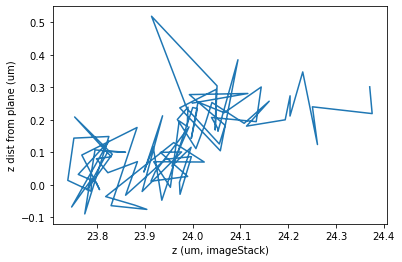

In [12]:
_tmp = gelPos[gelPos['z dist from plane (um)'] > - 1].xs(81,level='particle')
sns.lineplot(y ='z dist from plane (um)', x='z (um, imageStack)', data=_tmp,sort=False)

In [13]:
cutOff = 2
_gelIdx = gelPos[gelPos['z dist from plane (um)'] > -1*cutOff].xs(0,level='frame').index.intersection(gelPos[gelPos['z dist from plane (um)'] > -1*cutOff].xs(89,level='frame').index)
gel_idx_multi = pd.MultiIndex.from_product([range(90), _gelIdx],names=['frame', 'particle'])
gelPos.loc[gel_idx_multi].xs(0,level=0)['z dist from plane (um)']

particle
76     -0.857928
81      0.301497
117     0.241772
176    -1.676916
177    -1.186776
          ...   
3135   -0.328106
3137   -0.691151
3138   -0.519059
3158   -1.613382
3159   -1.119502
Name: z dist from plane (um), Length: 328, dtype: float64

## Visualize particle displacements in image coordinates

In [15]:
fPath = '/Users/zsolt/Colloid/DATA/tfrGel10212018x/tfrGel10212018A_shearRun10292018f/ovito/track_topGel'
fName_frmt = 'topGel_z5_completeTraj_t{:02}.xyz'
posKeys = ['{} (um, rheo_sedHeight)'.format(x) for x in ['x','y','z']]
tmp = gelPos.loc[pd.MultiIndex.from_product([range(90), _gelIdx])]
refPos = tmp.xs(0,level=0)[posKeys]
for t in range(90):
    curPos = tmp.xs(t,level=0)[posKeys]
    disp = pd.DataFrame(curPos - refPos)
    theta = pd.Series(disp[posKeys[1]]/disp[posKeys[0]],name='theta').to_frame()
    df = curPos.join(disp,rsuffix=' displacement').join(theta)
    da.df2xyz(df,fPath,fName_frmt.format(t))
    

In [16]:
tmp = gelPos.loc[gel_idx_multi]
refPos = tmp.xs(0,level=0)[posKeys]
dx = tmp.xs(1,level=0)[posKeys] - refPos
theta = pd.Series(data = dx[posKeys[1]]/dx[posKeys[0]],name='theta').to_frame()
refPos.join(dx,rsuffix=' displacement').join(theta)
#dx[posKeys[1]]/dx[posKeys[0]]
#refPos.join(pd.DataFrame(tmp.xs(1,level=0)[posKeys] - refPos, columns=['dx','dy','dz']))

,"x (um, rheo_sedHeight)","y (um, rheo_sedHeight)","z (um, rheo_sedHeight)","x (um, rheo_sedHeight) displacement","y (um, rheo_sedHeight) displacement","z (um, rheo_sedHeight) displacement",theta
particle,,,,,,,
76,-38.927544,106.954190,22.954479,0.052357,0.032929,-0.043363,0.628944
81,-26.961592,87.981522,24.370547,0.010476,-0.007446,0.005118,-0.710766
117,5.442212,103.720112,23.906213,-0.019516,0.018386,0.013145,-0.942109
176,49.220088,101.878322,21.819429,0.005673,-0.007281,-0.058586,-1.283277
177,34.945558,104.987522,22.323280,0.021907,-0.006061,-0.015481,-0.276678
...,...,...,...,...,...,...,...
3135,93.642194,-81.559287,25.972397,-0.008155,-0.032272,0.006928,3.957314
3137,90.136612,-113.131205,26.142487,0.037040,-0.012014,0.047189,-0.324358
3138,100.658795,-114.925795,26.296325,-0.006510,-0.034104,-0.024787,5.238649


# rotate coordinate system to para/perp

In [17]:
# rotate coordinate system to para/perp
reload(rotation)
rotDict = rotation.parseRotYaml(meta['rotation']['rotationMatrix'])
r_left = rotDict['prod_zyx (left)']
r_left

array([[ 0.99974261, -0.02268733,  0.        ],
       [ 0.02268733,  0.99974261,  0.        ],
       [ 0.        ,  0.        ,  1.        ]])

In [18]:
meta['rotation']['rotationMatrix']

{'coordStr': '(um, rheo_sedHeight)',
 'handed': 'right',
 'positiveSignature': 'clockwise',
 'units': 'degrees',
 'theta_x': 0,
 'theta_y': 0,
 'theta_z': 1.3}

In [96]:
gelPos
gridPos

x (um, imageStack)  y (um, imageStack)  z (um, imageStack)  \
frame particle                                                               
0     664925             70.650483           25.831199           84.790793   
      665370             79.422830           25.362258           84.120174   
      665394             89.826679           42.536789           84.198591   
      665400             90.349925           45.285455           84.198681   
      665404             59.681629            3.704263           84.283038   
...                            ...                 ...                 ...   
89    961917            195.025987          195.644019           83.167917   
      961918            186.553192          195.812523           83.099838   
      961967            212.847993          186.962579           83.143742   
      961971            210.483819          188.434780           83.268987   
      962032            187.543445          197.047749           83.333703   

                   x_std     y_std     z_std  x (um, rheo_sedHeight)  \
frame particle                                                         
0     664925    0.056462  0.056557  0.072860              -46.849517   
      665370    0.072270  0.070667  0.072193              -38.077170   
      665394    0.048513  0.046951  0.052895              -27.673321   
      665400    0.042119  0.043430  0.046652              -27.150075   
      665404    0.070583  0.073003  0.067517              -57.818371   
...                  ...       ...       ...                     ...   
89    961917    0.062071  0.059886  0.083756               77.525987   
      961918    0.047849  0.046265  0.053468               69.053192   
      961967    0.047284  0.048090  0.056795               95.347993   
      961971    0.059983  0.059457  0.074504               92.983819   
      962032    0.047381  0.048082  0.055455               70.043445   

                y (um, rheo_sedHeight)  z (um, rheo_sedHeight)  \
frame particle                                                   
0     664925                 91.668801               84.790793   
      665370                 92.137742               84.120174   
      665394                 74.963211               84.198591   
      665400                 72.214545               84.198681   
      665404                113.795737               84.283038   
...                                ...                     ...   
89    961917                -78.144019               83.167917   
      961918                -78.312523               83.099838   
      961967                -69.462579               83.143742   
      961971                -70.934780               83.268987   
      962032                -79.547749               83.333703   

                x (um, rheo_sedHeight) rotated  \
frame particle                                   
0     664925                        -48.917179   
      665370                        -40.157729   
      665394                        -29.366914   
      665400                        -28.781442   
      665404                        -60.385211   
...                                        ...   
89    961917                         79.278912   
      961918                         70.812121   
      961967                         96.899372   
      961971                         94.569207   
      962032                         71.830143   

                y (um, rheo_sedHeight) rotated  z (um, rheo_sedHeight) rotated  
frame particle                                                                  
0     664925                         90.582315                       84.790793  
      665370                         91.250157                       84.120174  
      665394                         74.316082                       84.198591  
      665400                         71.579995                       84.198681  
      665404                        112.454703                      

In [19]:
gelPos = gelPos.loc[gel_idx_multi].join(rotation.rotatePosition(gelPos.loc[gel_idx_multi],r_left),rsuffix = ' rotated')
gridPos = sedPos.loc[grid_idx_multi].join(rotation.rotatePosition(sedPos.loc[grid_idx_multi], r_left), rsuffix = ' rotated')

In [20]:
gelPos
gridPos_center = gridPos[(gridPos['x (um, rheo_sedHeight)'] < 40) & 
        (gridPos['x (um, rheo_sedHeight)'] > -40) &
        (gridPos['y (um, rheo_sedHeight)'] > -40) &
        (gridPos['y (um, rheo_sedHeight)'] < 40)]

In [70]:
# dont know why this is here
#gelPos = gelPos[gelPos.columns[0:10]]
#gridPos = gridPos[gridPos.columns[0:9]]

In [21]:
#gelPos
fPath = '/Users/zsolt/Colloid/DATA/tfrGel10212018x/tfrGel10212018A_shearRun10292018f/ovito/track_topGel'
fName_frmt = 'topGel_z5_completeTraj_rotated_t{:02}.xyz'
_rotKeys = ['{} (um, rheo_sedHeight) rotated'.format(x) for x in ['x','y','z']]
rotation.disp2xyz(gelPos,gel_idx_multi, fPath=fPath, fName_frmt=fName_frmt, posKeys =_rotKeys )

'/Users/zsolt/Colloid/DATA/tfrGel10212018x/tfrGel10212018A_shearRun10292018f/ovito/track_topGel/topGel_z5_completeTraj_rotated_t{:02}.xyz'

In [22]:
# grid disp, rotated
fPath = '/Users/zsolt/Colloid/DATA/tfrGel10212018x/tfrGel10212018A_shearRun10292018f/ovito/track_grid'
fName_frmt = 'grid_z1_completeTraj_rotated_t{:02}.xyz'
_rotKeys = ['{} (um, rheo_sedHeight) rotated'.format(x) for x in ['x','y','z']]
rotation.disp2xyz(gridPos,grid_idx_multi,fPath = fPath, fName_frmt = fName_frmt, posKeys=_rotKeys )

'/Users/zsolt/Colloid/DATA/tfrGel10212018x/tfrGel10212018A_shearRun10292018f/ovito/track_grid/grid_z1_completeTraj_rotated_t{:02}.xyz'

In [72]:
grid_idx_multi

MultiIndex([( 0, 664925),
            ( 0, 665370),
            ( 0, 665394),
            ( 0, 665400),
            ( 0, 665404),
            ( 0, 665408),
            ( 0, 665412),
            ( 0, 665418),
            ( 0, 665420),
            ( 0, 665429),
            ...
            (89, 961900),
            (89, 961903),
            (89, 961904),
            (89, 961910),
            (89, 961912),
            (89, 961917),
            (89, 961918),
            (89, 961967),
            (89, 961971),
            (89, 962032)],
           names=['frame', 'particle'], length=182610)

In [23]:
lowBoundary_df = pd.DataFrame(gelPos.loc[gel_idx_multi],index=gelPos.loc[gel_idx_multi].index.rename(('frame', 'particle')))

In [25]:
lowBoundary_df

x (um, imageStack)  y (um, imageStack)  z (um, imageStack)  \
frame particle                                                               
0     76                 78.572456           10.545810           22.954479   
      81                 90.538408           29.518478           24.370547   
      117               122.942212           13.779888           23.906213   
      176               166.720088           15.621678           21.819429   
      177               152.445558           12.512478           22.323280   
...                            ...                 ...                 ...   
89    3135              211.178726          198.383397           25.637436   
      3137              207.610877          229.925868           25.799967   
      3138              218.158187          231.711911           25.951285   
      3158              209.250655          227.711831           24.849030   
      3159              189.241362          203.071520           25.012704   

                   x_std     y_std     z_std  x (um, rheo_sedHeight)  \
frame particle                                                         
0     76        0.105656  0.108187  0.090575              -38.927544   
      81        0.126569  0.122406  0.108938              -26.961592   
      117       0.157238  0.161360  0.109194                5.442212   
      176       0.137218  0.130926  0.108172               49.220088   
      177       0.154108  0.156162  0.144701               34.945558   
...                  ...       ...       ...                     ...   
89    3135      0.125063  0.138053  0.103264               93.678726   
      3137      0.087379  0.081290  0.067365               90.110877   
      3138      0.079485  0.079401  0.069254              100.658187   
      3158      0.099039  0.095703  0.083281               91.750655   
      3159      0.116441  0.113905  0.103971               71.741362   

                y (um, rheo_sedHeight)  z (um, rheo_sedHeight)  \
frame particle                                                   
0     76                    106.954190               22.954479   
      81                     87.981522               24.370547   
      117                   103.720112               23.906213   
      176                   101.878322               21.819429   
      177                   104.987522               22.323280   
...                                ...                     ...   
89    3135                  -80.883397               25.637436   
      3137                 -112.425868               25.799967   
      3138                 -114.211911               25.951285   
      3158                 -110.211831               24.849030   
      3159                  -85.571520               25.012704   

                z dist from plane (um)  x (um, rheo_sedHeight) rotated  \
frame particle                                                           
0     76                     -0.857928                      -41.344029   
      81                      0.301497                      -28.950718   
      117                     0.241772                        3.087678   
      176                    -1.676916                       46.896072   
      177                    -1.186776                       32.554677   
...                                ...                             ...   
89    3135                   -0.291448                       95.489643   
      3137                   -0.680917                       92.638326   
      3138                   -0.500962                      103.223442   
      3158                   -1.585366                       94.227452   
      3159                   -1.117498                       73.664286   

                y (um, rheo_sedHeight) rotated  z (um, rheo_sedHeight) rotated  
frame particle                                                                  
0     76                            106.043499                       22.954479  

57.46979601899298

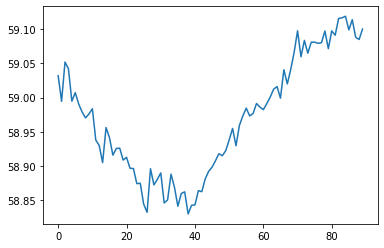

In [32]:
# get the thickness of the sample
h = sedPos.loc[grid_idx_multi]['z (um, rheo_sedHeight)'].groupby('frame').mean() - lowBoundary_df['z (um, rheo_sedHeight)'].groupby('frame').mean()
sns.lineplot(x=range(90), y = h.to_numpy() )
h_mean = h.mean() - 1.5
h_mean

In [181]:
1.3*h_mean

74.71073482469087

In [84]:
#refPos_np = gridPos[_keys].loc[(0,slice(None)),:].to_numpy()

In [33]:
_keys = ['{} (um, rheo_sedHeight) rotated'.format(x) for x in ['x','y','z']]
grid_disp = pd.DataFrame(gridPos[_keys].to_numpy() - np.vstack([gridPos[_keys].loc[(0,slice(None)),:].to_numpy()]*90),
                         index=gridPos.index.set_names(['frame','particle']),
                         columns=_keys).groupby('frame').mean()
grid_disp_center = pd.DataFrame(gridPos_center[_keys].to_numpy() - np.vstack([gridPos_center[_keys].loc[(0,slice(None)),:].to_numpy()]*90),
                         index=gridPos_center.index.set_names(['frame','particle']),
                         columns=_keys).groupby('frame').mean()
sns.lineplot(x=range(90), y=grid_disp_center[_keys[0]])

ValueError: operands could not be broadcast together with shapes (23815,3) (22590,3) 

In [28]:
gridPos_center
#gridPos
#gridPoscenter_idx = gridPos_center[_keys].loc[(0,slice(None)),:].index.intersection(gridPos_center[_keys].loc[(89,slice(None)),:])
grid_pos_center_idx = gridPos_center[_keys].xs(89,level='frame').index.intersection(gridPos_center[_keys].xs(0,level='frame').index)
grid_pos_center_idx_multi = pd.MultiIndex.from_product([range(90),grid_pos_center_idx])
#gridPos_center[_keys].loc[(0,grid_pos_center_idx),:]
gridPos_center.loc[grid_pos_center_idx_multi][_keys].loc[(0,slice(None)),:].to_numpy();

In [29]:
refPos_np = gridPos_center.loc[grid_pos_center_idx_multi][_keys].loc[(0,slice(None)),:].to_numpy()

grid_disp_center = pd.DataFrame(gridPos_center.loc[grid_pos_center_idx_multi][_keys].to_numpy() - np.vstack([refPos_np]*90),
                         index=grid_pos_center_idx_multi.set_names(['frame','particle']),
                         columns=_keys).groupby('frame').mean()

In [138]:
grid_disp_center

,"x (um, rheo_sedHeight) rotated","y (um, rheo_sedHeight) rotated","z (um, rheo_sedHeight) rotated"
frame,,,
0,0.000000,0.000000,0.000000
1,0.099878,-0.085044,-0.050848
2,0.307439,-0.049968,-0.078510
3,0.504884,-0.032239,-0.122925
4,0.675092,-0.045791,-0.172052
...,...,...,...
85,0.316959,-0.068143,-0.238573
86,0.313038,-0.099573,-0.230027
87,0.324456,-0.088676,-0.253798


In [31]:
grid_disp_center = pd.DataFrame(gridPos_center[_keys].to_numpy() - np.vstack([gridPos_center[_keys].loc[(0,slice(None)),:].to_numpy()]*90),
                         index=gridPos_center.index.set_names(['frame','particle']),
                         columns=_keys).groupby('frame').mean()

ValueError: operands could not be broadcast together with shapes (23815,3) (22590,3) 

In [35]:
_keys = ['{} (um, rheo_sedHeight) rotated'.format(x) for x in ['x','y','z']]
refPos = gelPos.xs(0,level=0)[_keys]
gelTop_disp = pd.DataFrame(gelPos[_keys].to_numpy() - np.vstack([refPos.to_numpy()]*90),index=gelPos.index,columns=_keys).groupby('frame').mean()

<AxesSubplot:ylabel='x (um, rheo_sedHeight) rotated'>

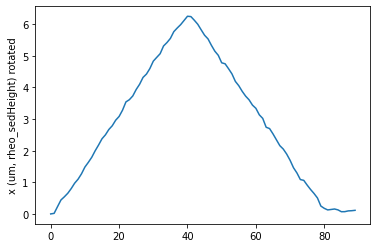

In [45]:
sns.lineplot(x=range(90), y=gelTop_disp[_keys[0]])

<AxesSubplot:ylabel='x (um, rheo_sedHeight) rotated'>

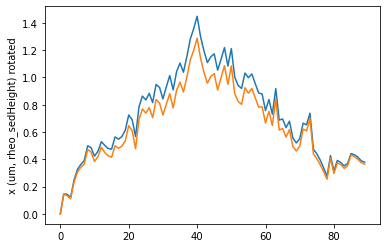

In [39]:
# plot boundary strain vs. time for para and perp components
sns.lineplot(x=range(90),y = 100*(grid_disp[_keys[0]] - gelTop_disp[_keys[0]])/h_mean)
sns.lineplot(x=range(90),y = 100*(grid_disp_center[_keys[0]] - gelTop_disp[_keys[0]])/h_mean)

<AxesSubplot:ylabel='y (um, rheo_sedHeight) rotated'>

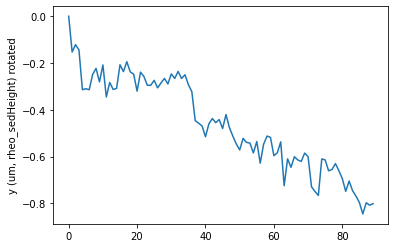

In [37]:
sns.lineplot(x=range(90),y = 100*(grid_disp[_keys[1]] - gelTop_disp[_keys[1]])/h_mean)

<AxesSubplot:ylabel='z (um, rheo_sedHeight) rotated'>

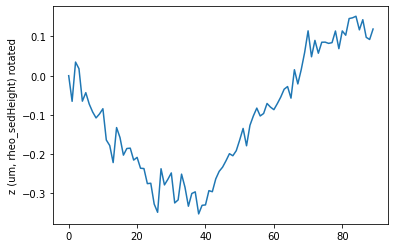

In [48]:
sns.lineplot(x=range(90),y = 100*(grid_disp[_keys[2]] - gelTop_disp[_keys[2]])/h_mean)

In [96]:
# load strain
traj_micro = sedStrain_traj.loc[([1,4,7],['exx','exy']),['(0,1)','(0,2)']]

In [122]:
idx = traj_micro.transpose().stack('particle').index.set_names(['frame','particle'])
traj_t = pd.DataFrame(traj_micro.transpose().stack('particle'),index=idx)
traj_t

values               exx       exy
frame particle                    
(0,1) 1         0.011591 -0.010121
      4         0.004609  0.000526
      7        -0.002058 -0.000601
(0,2) 1        -0.038838 -0.003519
      4         0.003765 -0.006984
      7         0.006120 -0.004120

# Transform strain coordinates
- r_left was applied to positions after converting (um, imageStack) -> (um, rheo_sedHeight)
- including this coordinate transform will give new rotation matrix rc_left = r_left @ np.array((1,0,0),(0,-1,0),(0,0,1))
- I am going to compare the following:
  - r_left @ strain @ r_left.T
  - (r_left.T) @ strain @ r_left
  - (rc_left) @ strain @ rc_left.T
  - (rc_left.T) @ strain @ rc_left

In [44]:
# convert trajectory format to frameParticle format
sedStrain_tmp = sedStrain_traj.transpose().stack('particle')
idx = sedStrain_tmp.index.set_names(['frame','particle'])
sedStrain_frameParticle = pd.DataFrame(sedStrain_tmp, index = idx)
sedStrain_frameParticle

values             D2_min       exx       exy       exz       eyy       eyz  \
frame  particle                                                               
(0,1)  1         0.091007  0.011591 -0.010121 -0.007984  0.008537  0.004810   
       4         0.072556  0.004609  0.000526 -0.010615 -0.007425 -0.015354   
       7         0.068485 -0.002058 -0.000601 -0.003270 -0.004937 -0.020609   
       8         0.123259 -0.003628 -0.002255  0.003940 -0.009127 -0.000940   
       12        0.263317 -0.008424 -0.002495  0.003048  0.009275 -0.013323   
...                   ...       ...       ...       ...       ...       ...   
(0,89) 966608    0.599882  0.028857  0.010630 -0.058179  0.022753  0.013150   
       966609    2.120843 -0.014212  0.049120  0.031294  0.021256  0.073846   
       966611    0.386537 -0.000219 -0.003213  0.022503 -0.006216  0.003287   
       966612    0.359476  0.003795 -0.016597 -0.000576  0.012263  0.015917   
       966614    0.625155 -0.011404  0.000857 -0.001301  0.008125  0.021885   

values                ezz  nnb count       rxy       rxz       ryz  
frame  particle                                                     
(0,1)  1         0.044463        6.0 -0.002290  0.004448  0.000674  
       4        -0.031272        6.0  0.002729 -0.003001  0.014332  
       7        -0.001219        9.0 -0.005521  0.004756 -0.010854  
       8         0.029012       11.0 -0.013784  0.002774 -0.000732  
       12       -0.084368        8.0  0.002554 -0.013346  0.023345  
...                   ...        ...       ...       ...       ...  
(0,89) 966608    0.051486        7.0  0.017736 -0.035023 -0.021668  
       966609    0.038145        8.0  0.077705  0.027482 -0.021541  
       966611   -0.005890       15.0  0.000467  0.004727  0.003028  
       966612    0.025330       15.0 -0.000943 -0.008652  0.005424  
       966614    0.002325       15.0  0.020613  0.015556  0.030392  

[82166583 rows x 11 columns]

## This is deeply flawed...
## Update: No its fine (March 7 2021) 
rc_left is no longer orthogonal. So rc_left.T is not inverse(rc_left)..so call _rotate wont work with rc_left or rc_leftT
- I think I fixed this by altering the code in rotation to have r @ strain @ np.linalg.inv(r) as opposed to r @ strain @ r.T
- No this is fine. rc_left is still orthogonal...

In [74]:
reload(rotation)

<module 'data_analysis.rotation' from '/Users/zsolt/Colloid_git/TractionRheoscopy/data_analysis/rotation.py'>

In [45]:
r_left, np.array(((1,0,0),(0,-1,0),(0,0,1))), r_left@np.array(((1,0,0),(0,-1,0),(0,0,1)))
rc_left = r_left @ np.array(((1,0,0),(0,-1,0),(0,0,1)))
#r_left_rot = r_left@np.array(((1,0,0),(0,-1,0),(0,0,1)))
rc_left, np.linalg.inv(rc_left), rc_left @ rc_left.T, rc_left - rc_left.T, r_left@r_left.T

(array([[ 0.99974261,  0.02268733,  0.        ],
        [ 0.02268733, -0.99974261,  0.        ],
        [ 0.        ,  0.        ,  1.        ]]),
 array([[ 0.99974261,  0.02268733,  0.        ],
        [ 0.02268733, -0.99974261, -0.        ],
        [ 0.        ,  0.        ,  1.        ]]),
 array([[1.00000000e+00, 4.49320407e-19, 0.00000000e+00],
        [4.49320407e-19, 1.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]]),
 array([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]),
 array([[1.00000000e+00, 4.49320407e-19, 0.00000000e+00],
        [4.49320407e-19, 1.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]]))

In [46]:
_sig_np = np.array([(0,0), (0,1), (0,2), (1,1), (1,2), (2,2)])
rot_np_r_left = rotation._rotate(sedStrain_frameParticle[['exx','exy','exz','eyy','eyz','ezz']].to_numpy(), _sig_np, r_left )
rot_np_r_leftT = rotation._rotate(sedStrain_frameParticle[['exx','exy','exz','eyy','eyz','ezz']].to_numpy(), _sig_np, r_left.T )
rot_np_rc_left = rotation._rotate(sedStrain_frameParticle[['exx','exy','exz','eyy','eyz','ezz']].to_numpy(), _sig_np, rc_left )
rot_np_rc_leftT = rotation._rotate(sedStrain_frameParticle[['exx','exy','exz','eyy','eyz','ezz']].to_numpy(), _sig_np, rc_left.T )

In [47]:
rot_df_rc_left = pd.DataFrame(data=rot_np_rc_left, index=sedStrain_frameParticle.index, columns= ['exx','exy','exz','eyy','eyz','ezz']).join(sedStrain_frameParticle[['nnb count','D2_min']])
rot_df_rc_leftT = pd.DataFrame(data=rot_np_rc_leftT, index=sedStrain_frameParticle.index, columns= ['exx','exy','exz','eyy','eyz','ezz']).join(sedStrain_frameParticle[['nnb count','D2_min']])

In [48]:
rot_df_r_leftT = pd.DataFrame(data=rot_np_r_leftT, index=sedStrain_frameParticle.index, columns= ['exx','exy','exz','eyy','eyz','ezz']).join(sedStrain_frameParticle[['nnb count','D2_min']])

In [198]:
# include coord transofrm on strain
#r_left_rot = r_left@np.array(((1,0,0),(0,-1,0),(0,0,1)))
#rot_np_coordTransform = rotation._rotate(sedStrain_frameParticle[['exx','exy','exz','eyy','eyz','ezz']].to_numpy(), _sig_np, r_left_rot )
#rot_df_coordTransform = pd.DataFrame(data=rot_np_coordTransform, index=sedStrain_frameParticle.index, columns= ['exx','exy','exz','eyy','eyz','ezz']).join(sedStrain_frameParticle[['nnb count','D2_min']])#

In [49]:
strain_mean_rc_left = rot_df_rc_left[rot_df_rc_left['nnb count'] > 5].groupby('frame').mean()
strain_mean_rc_leftT = rot_df_rc_leftT[rot_df_rc_leftT['nnb count'] > 5].groupby('frame').mean()

tmp_rc_left = strain_mean_rc_left.reset_index()
tmp_rc_leftT = strain_mean_rc_leftT.reset_index()
tmp_rc_leftT['frame num'] = tmp_rc_leftT['frame'].apply(lambda fstr: int(fstr.split(',')[-1][:-1]))
tmp_rc_left['frame num'] = tmp_rc_left['frame'].apply(lambda fstr: int(fstr.split(',')[-1][:-1]))
tmp_rc_left = tmp_rc_left.set_index('frame num').sort_index()
tmp_rc_leftT = tmp_rc_leftT.set_index('frame num').sort_index()
tmp_rc_left

,frame,exx,exy,exz,eyy,eyz,ezz,nnb count,D2_min
frame num,,,,,,,,,
1,"(0,1)",-0.000120,0.000001,0.000767,-0.000065,-0.000521,-0.001305,13.827784,0.187225
2,"(0,2)",-0.000116,0.000035,0.000690,-0.000157,-0.000404,-0.000422,13.807256,0.202566
3,"(0,3)",-0.000056,0.000051,0.000496,-0.000252,-0.000617,-0.000464,13.799770,0.209327
4,"(0,4)",-0.000139,0.000114,0.001123,-0.000301,-0.001276,-0.001106,13.794912,0.215111
5,"(0,5)",-0.000239,0.000129,0.001406,-0.000282,-0.001411,-0.000826,13.790355,0.222561
...,...,...,...,...,...,...,...,...,...
85,"(0,85)",-0.000699,0.000534,0.001687,-0.001459,-0.003249,-0.001645,13.596523,0.847530
86,"(0,86)",-0.000674,0.000535,0.001683,-0.001491,-0.003435,-0.001437,13.595265,0.856451
87,"(0,87)",-0.000661,0.000539,0.001596,-0.001514,-0.003207,-0.001751,13.594162,0.861372


In [50]:
strain_mean_r_leftT = rot_df_r_leftT[rot_df_r_leftT['nnb count'] > 5].groupby('frame').mean()

tmp_r_leftT = strain_mean_r_leftT.reset_index()
tmp_r_leftT['frame num'] = tmp_r_leftT['frame'].apply(lambda fstr: int(fstr.split(',')[-1][:-1]))

tmp_r_leftT = tmp_r_leftT.set_index('frame num').sort_index()

tmp_r_leftT

,frame,exx,exy,exz,eyy,eyz,ezz,nnb count,D2_min
frame num,,,,,,,,,
1,"(0,1)",-0.000120,-0.000001,0.000767,-0.000065,0.000521,-0.001305,13.827784,0.187225
2,"(0,2)",-0.000116,-0.000035,0.000690,-0.000157,0.000404,-0.000422,13.807256,0.202566
3,"(0,3)",-0.000056,-0.000051,0.000496,-0.000252,0.000617,-0.000464,13.799770,0.209327
4,"(0,4)",-0.000139,-0.000114,0.001123,-0.000301,0.001276,-0.001106,13.794912,0.215111
5,"(0,5)",-0.000239,-0.000129,0.001406,-0.000282,0.001411,-0.000826,13.790355,0.222561
...,...,...,...,...,...,...,...,...,...
85,"(0,85)",-0.000699,-0.000534,0.001687,-0.001459,0.003249,-0.001645,13.596523,0.847530
86,"(0,86)",-0.000674,-0.000535,0.001683,-0.001491,0.003435,-0.001437,13.595265,0.856451
87,"(0,87)",-0.000661,-0.000539,0.001596,-0.001514,0.003207,-0.001751,13.594162,0.861372


In [54]:
# compare two strains vs. time
#rot_df.index

In [169]:
#strain_mean_rc_leftT = rot_df[rot_df['nnb count'] > 5].groupby('frame').mean()

In [55]:
#tmp = strain_mean.reset_index()
#tmp['frame num'] = tmp['frame'].apply(lambda fstr: int(fstr.split(',')[-1][:-1]))
#tmp = tmp.set_index('frame num').sort_index()
#tmp

<AxesSubplot:xlabel='frame', ylabel='y (um, rheo_sedHeight) rotated'>

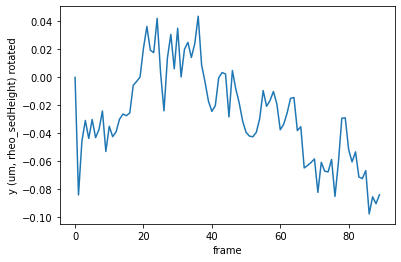

In [56]:
sns.lineplot(y=grid_disp[_keys[1]], x= grid_disp.index)

<AxesSubplot:xlabel='frame num', ylabel='x (um, rheo_sedHeight) rotated'>

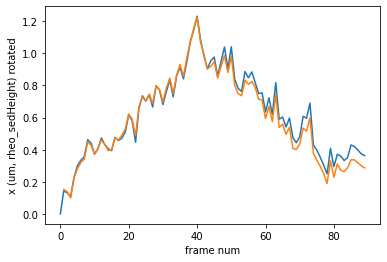

In [51]:
sns.lineplot(x=range(90),y = 100*(grid_disp_center[_keys[0]] - 1.0051*gelTop_disp[_keys[0]])/(h_mean))
sns.lineplot(data=tmp_r_leftT, x=tmp_rc_leftT.index, y=tmp_rc_leftT['exz']*200)

In [179]:
dt = 0.01
time_lag = [-dt for x in range(0,40)] + [dt for x in range(40,90)]
len(time_lag)

90

In [225]:
# if h_mean is 59um, what is the displacement of the plate in in the time it takes to scan through the sample? 
grid_disp_center[_keys[0]].to_numpy()[1:] -grid_disp_center[_keys[0]].to_numpy()[:-1]
v = 180/(3*60) # velocity of plate in nm/s
v_focal = 90000/(3*60) # scan velocity of focal plane
59000/v_focal*v
_time_lag2 = (grid_disp_center[_keys[0]].to_numpy()[1:] -grid_disp_center[_keys[0]].to_numpy()[:-1])*1000/(3*60)*59000/v_focal
time_lag2 = np.zeros(90)
time_lag2[1:] = _time_lag2
time_lag2/1000

array([ 0.        ,  0.06547587,  0.13606734,  0.12943634,  0.11158067,
        0.10120536,  0.11009181,  0.12032886,  0.12317698,  0.10399931,
        0.11495347,  0.11058069,  0.13104633,  0.12010483,  0.1113247 ,
        0.12512434,  0.11297973,  0.10433948,  0.08329483,  0.13022072,
        0.11889897,  0.11617939,  0.12214362,  0.12633433,  0.10638048,
        0.12315441,  0.12372409,  0.1138695 ,  0.11906434,  0.10572021,
        0.11957145,  0.10846916,  0.10521667,  0.12117177,  0.11953338,
        0.10824845,  0.11272906,  0.11668398,  0.11725395,  0.11367059,
        0.12062375, -0.06226024, -0.11504464, -0.11276999, -0.09727141,
       -0.10480771, -0.1204814 , -0.10011789, -0.08798766, -0.13644108,
       -0.1046701 , -0.09689969, -0.12373476, -0.1153343 , -0.11016552,
       -0.10464793, -0.10320543, -0.12519767, -0.1022036 , -0.10920863,
       -0.11120503, -0.10253357, -0.11283463, -0.11020376, -0.11368629,
       -0.10557035, -0.14612954, -0.10155914, -0.11638674, -0.11

<AxesSubplot:xlabel='frame num', ylabel='x (um, rheo_sedHeight) rotated'>

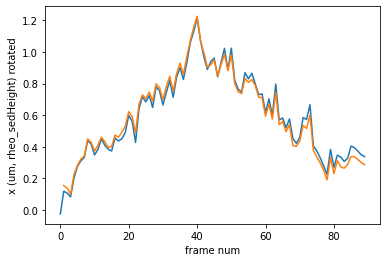

In [86]:
dt = 0.015
time_lag = [dt for x in range(0,41)] + [dt for x in range(41,90)]
sns.lineplot(x=range(90),y = 100*(grid_disp_center[_keys[0]] -np.array(time_lag) - 1.004*gelTop_disp[_keys[0]])/(h_mean))
sns.lineplot(data=tmp_rc_left, x=tmp_rc_left.index, y=tmp_rc_left['exz']*200)
#ns.lineplot(x=range(90),y = 100*(grid_disp_center[_keys[0]] -np.array(time_lag2)/2000 - 1.00*gelTop_disp[_keys[0]])/(h_mean))

In [204]:
from matplotlib import pyplot as plt
sns.set(rc={'figure.figsize':(16,9)})
sns.set_context("talk")
figPath_frmt = '/Users/zsolt/Dropbox/Colloid/Harvard/Manuscripts/TractionForceRheology_Technique_PRL/Figures/v_06/{}'

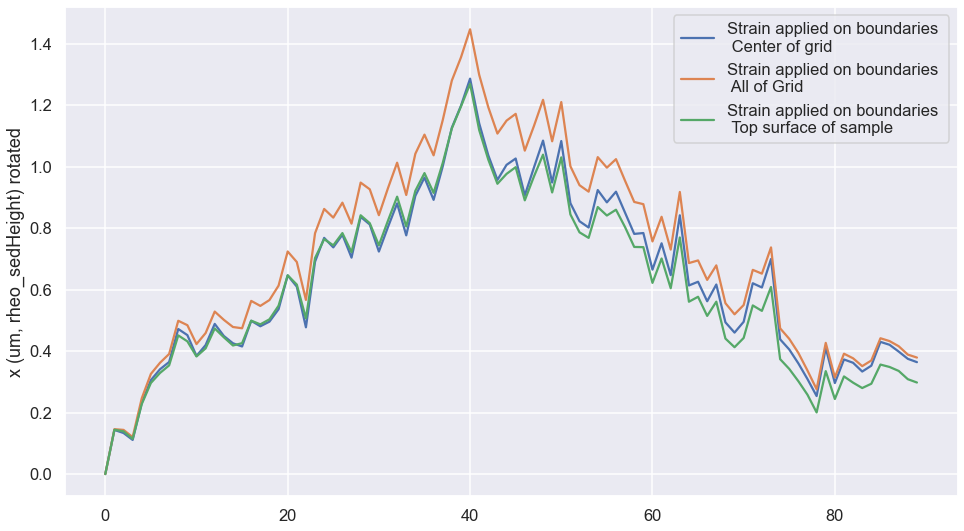

In [287]:
dt =0.0
mag_gel = 1.00
time_lag = [dt for x in range(0,41)] + [dt for x in range(41,90)]
sns.lineplot(x=range(90),y = 100*(grid_disp_center[_keys[0]] -np.array(time_lag) - mag_gel*gelTop_disp[_keys[0]])/(h_mean), label='Strain applied on boundaries \n Center of grid')
sns.lineplot(x=range(90),y = 100*(grid_disp[_keys[0]] -np.array(time_lag) - mag_gel*gelTop_disp[_keys[0]])/(h_mean), label='Strain applied on boundaries \n All of Grid')
sns.lineplot(x=range(90),y = 100*(sedTop_disp[_keys[0]]  - mag_gel*gelTop_disp[_keys[0]])/(h_mean), label='Strain applied on boundaries \n Top surface of sample')
#ns.lineplot(data=tmp_rc_left, x=tmp_rc_left.index, y=tmp_rc_left['exz']*200, label='Volume avg. local strain')
plt.savefig(figPath_frmt.format('strain_timeSeries_comparison_gridDisplacement.pdf'),dpi=300)

<AxesSubplot:ylabel='x (um, rheo_sedHeight) rotated'>

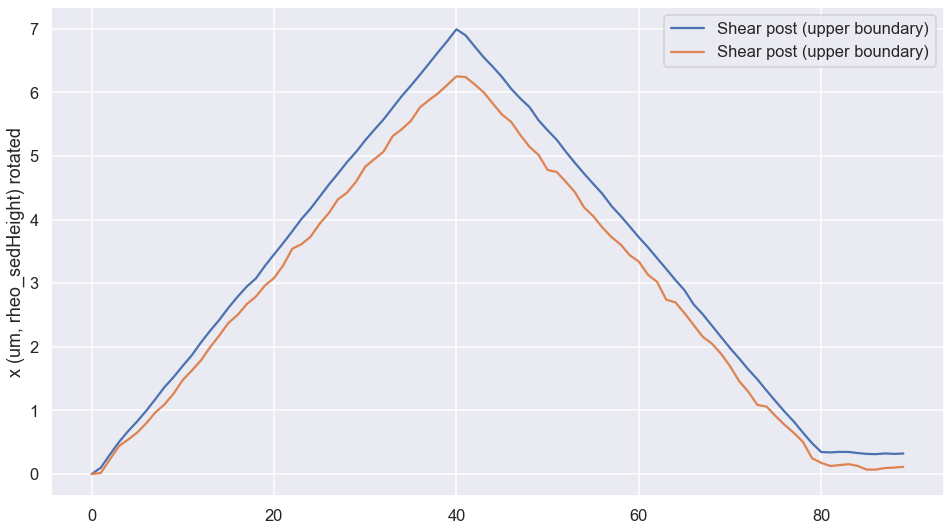

In [134]:
sns.lineplot(x=range(90),y = grid_disp_center[_keys[0]], label='Shear post (upper boundary)')
sns.lineplot(x=range(90),y = gelTop_disp[_keys[0]], label='Shear post (upper boundary)')

In [136]:
offset_um = 0.15*(937-163)
fitPlane_dict = da.fitTopSurface(gelPos)

In [141]:
gelPos['z (um, below gel)'] = gelPos['z dist from plane (um)']

In [145]:
gelPos

x (um, imageStack)  y (um, imageStack)  z (um, imageStack)  \
frame particle                                                               
0     76                 78.572456           10.545810           22.954479   
      81                 90.538408           29.518478           24.370547   
      117               122.942212           13.779888           23.906213   
      176               166.720088           15.621678           21.819429   
      177               152.445558           12.512478           22.323280   
...                            ...                 ...                 ...   
89    3135              211.178726          198.383397           25.637436   
      3137              207.610877          229.925868           25.799967   
      3138              218.158187          231.711911           25.951285   
      3158              209.250655          227.711831           24.849030   
      3159              189.241362          203.071520           25.012704   

                   x_std     y_std     z_std  x (um, rheo_sedHeight)  \
frame particle                                                         
0     76        0.105656  0.108187  0.090575              -38.927544   
      81        0.126569  0.122406  0.108938              -26.961592   
      117       0.157238  0.161360  0.109194                5.442212   
      176       0.137218  0.130926  0.108172               49.220088   
      177       0.154108  0.156162  0.144701               34.945558   
...                  ...       ...       ...                     ...   
89    3135      0.125063  0.138053  0.103264               93.678726   
      3137      0.087379  0.081290  0.067365               90.110877   
      3138      0.079485  0.079401  0.069254              100.658187   
      3158      0.099039  0.095703  0.083281               91.750655   
      3159      0.116441  0.113905  0.103971               71.741362   

                y (um, rheo_sedHeight)  z (um, rheo_sedHeight)  \
frame particle                                                   
0     76                    106.954190               22.954479   
      81                     87.981522               24.370547   
      117                   103.720112               23.906213   
      176                   101.878322               21.819429   
      177                   104.987522               22.323280   
...                                ...                     ...   
89    3135                  -80.883397               25.637436   
      3137                 -112.425868               25.799967   
      3138                 -114.211911               25.951285   
      3158                 -110.211831               24.849030   
      3159                  -85.571520               25.012704   

                z dist from plane (um)  x (um, rheo_sedHeight) rotated  \
frame particle                                                           
0     76                     -0.857928                      -41.344029   
      81                      0.301497                      -28.950718   
      117                     0.241772                        3.087678   
      176                    -1.676916                       46.896072   
      177                    -1.186776                       32.554677   
...                                ...                             ...   
89    3135                   -0.291448                       95.489643   
      3137                   -0.680917                       92.638326   
      3138                   -0.500962                      103.223442   
      3158                   -1.585366                       94.227452   
      3159                   -1.117498                       73.664286   

                y (um, rheo_sedHeight) rotated  \
frame particle                                   
0     76                            106.043499   
      81                             87.347190   
      117                           103.81

In [146]:
gel_keys = {'{}'.format(x) : '{} (um, rheo_sedHeight) rotated'.format(x) for x in ['x','y','z']}
gel_keys

{'x': 'x (um, rheo_sedHeight) rotated',
 'y': 'y (um, rheo_sedHeight) rotated',
 'z': 'z (um, rheo_sedHeight) rotated'}

In [148]:
reload(da)
gelStrain = da.gelStrain(gelPos,offset_um,frame=range(90), pos_keys=gel_keys)

In [149]:
gelStrain

Ref Pos     (0,0)     (0,1)  \
particle value                                                            
76       x (um, rheo_sedHeight) rotated  -41.344029  0.000000  0.051596   
         y (um, rheo_sedHeight) rotated  106.043499  0.000000  0.034109   
         z (um, rheo_sedHeight) rotated   22.954479  0.000000 -0.043363   
         e_xz                              0.000000  0.000000  0.000371   
         e_yz                              0.000000  0.000000  0.000245   
...                                             ...       ...       ...   
3159     z (um, rheo_sedHeight) rotated   25.355895  0.000000 -0.065037   
         e_xz                              0.000000  0.000000  0.000038   
         e_yz                              0.000000  0.000000  0.000172   
         e_zz                              0.000000  0.000000 -0.000460   
         z (um, below gel)                -1.119502 -1.119502 -1.092524   

                                            (0,2)     (0,3)     (0,4)  \
particle value                                                          
76       x (um, rheo_sedHeight) rotated  0.249149  0.396555  0.581370   
         y (um, rheo_sedHeight) rotated  0.035782  0.054110  0.106502   
         z (um, rheo_sedHeight) rotated -0.120176 -0.189013 -0.159597   
         e_xz                            0.001792  0.002852  0.004181   
         e_yz                            0.000257  0.000389  0.000766   
...                                           ...       ...       ...   
3159     z (um, rheo_sedHeight) rotated -0.093890 -0.120119 -0.160200   
         e_xz                            0.001359  0.002876  0.003501   
         e_yz                            0.000078  0.000542  0.001143   
         e_zz                           -0.000664 -0.000849 -0.001133   
         z (um, below gel)              -1.237188 -1.070467 -1.231075   

                                            (0,5)     (0,6)     (0,7)  \
particle value                                                          
76       x (um, rheo_sedHeight) rotated  0.667585  0.861632  1.049738   
         y (um, rheo_sedHeight) rotated  0.071194  0.098717  0.091251   
         z (um, rheo_sedHeight) rotated -0.153942 -0.129039 -0.236697   
         e_xz                            0.004801  0.006196  0.007549   
         e_yz                            0.000512  0.000710  0.000656   
...                                           ...       ...       ...   
3159     z (um, rheo_sedHeight) rotated -0.155631 -0.156907 -0.208348   
         e_xz                            0.003967  0.004959  0.006338   
         e_yz                            0.001356  0.001252  0.000864   
         e_zz                           -0.001100 -0.001109 -0.001473   
         z (um, below gel)              -1.222298 -1.236342 -0.997631   

                                            (0,8)  ...    (0,80)    (0,81)  \
particle value                                     ...                       
76       x (um, rheo_sedHeight) rotated  1.092048  ...  0.260968  0.204241   
         y (um, rheo_sedHeight) rotated  0.077116  ...  0.158118  0.151668   
         z (um, rheo_sedHeight) rotated -0.283916  ... -0.444106 -0.409910   
         e_xz                            0.007853  ...  0.001877  0.001469   
         e_yz                            0.000555  ...  0.001137  0.001091   
...                                           ...  ...       ...       ...   
3159     z (um, rheo_sedHeight) rotated -0.200254  ... -0.336510 -0.377606   
         e_xz                            0.007212  ...  0.000659 -0.000045   
         e_yz                            0.000817  ...  0.003729  0.003906   
         e_zz                           -0.001416  ... -0.002379 -0.002669   
         z (um, below gel)              -1.109008  ... -1.045822 -1.074780   

                                           (0,82)    (0,83)    (0,84)  \
particle value                                                          
76     

In [180]:
gelStrain.xs('e_xz',level='value').mean()[2:]

(0,1)     0.000123
(0,2)     0.001641
(0,3)     0.003137
(0,4)     0.003856
(0,5)     0.004650
            ...   
(0,85)    0.000499
(0,86)    0.000510
(0,87)    0.000681
(0,88)    0.000724
(0,89)    0.000811
Length: 89, dtype: float64

In [323]:
stress_para = 1500*gelStrain.xs('e_xz',level='value').mean().to_numpy()[1:] 
# 0: refPos, 1: (0,0), 2: (0,1) ... but, the stress at time 1 is very small as I have scanned through *just* the gel..
# whereas the strain in the sample at (0,1) is larger given the more time that was scanned through
strain_para = np.zeros(90)
strain_para[1:] = tmp_rc_left['exz'].to_numpy()

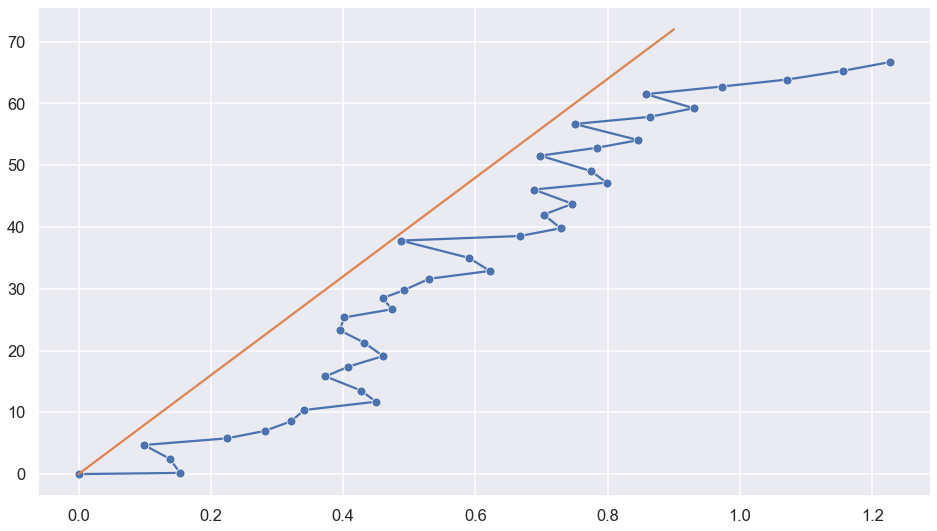

In [330]:
sns.lineplot(y=stress_para[0:41], x=200*strain_para[0:41], sort=False, marker = 'o')
G = 8 # Pa
e_min, e_max = 0, 0.92
sns.lineplot(y=G*1000*np.arange(0,e_max,0.1)/100,x=np.arange(0,e_max,0.1),sort=False)
plt.savefig(figPath_frmt.format('stressStrain_rotated_8PaLine.pdf'),dpi=300)

<AxesSubplot:>

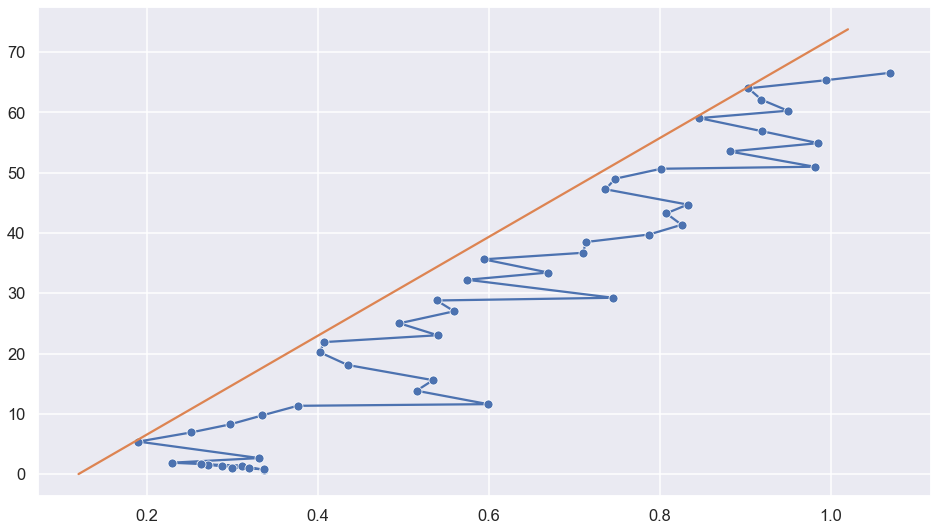

In [345]:
sns.lineplot(y=stress_para[41:89], x=200*strain_para[41:89], sort=False, marker = 'o')
G = 8.2 # Pa
epsilon_0 = 0.12
e_min, e_max = 0, 0.92
sns.lineplot(y=G*1000*np.arange(0,e_max,0.1)/100,x=np.arange(0,e_max,0.1)+epsilon_0,sort=False)
#plt.savefig(figPath_frmt.format('stressStrain_rotated_8PaLine.pdf'),dpi=300)

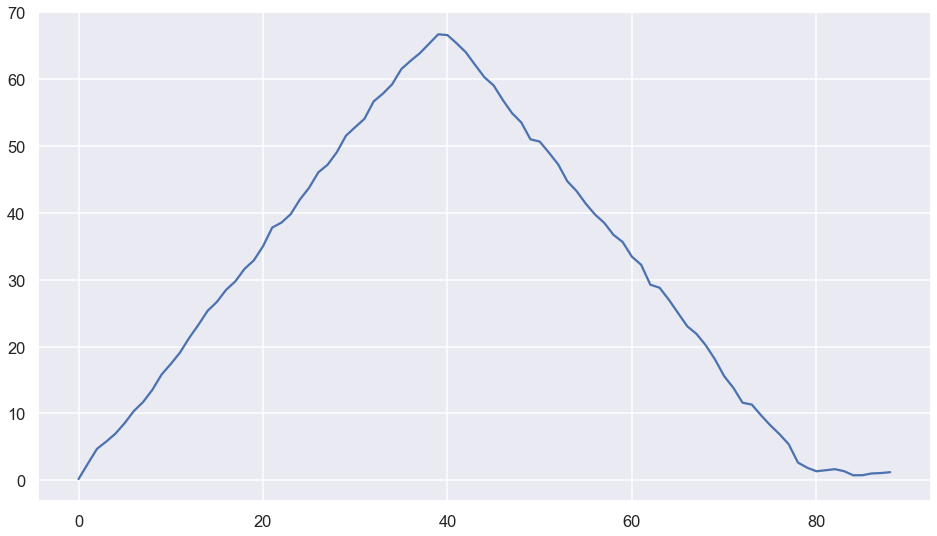

In [272]:
sns.lineplot(y=stress_para, x=range(89))
plt.savefig(figPath_frmt.format('stress_timeSeries.pdf'),dpi=300)

## What if we go back to calculating traction rheoscopy strain by averaging over the full field of view? 

In [233]:
sed_disp = sedPos.xs(41,level='frame') - sedPos.xs(0,level='frame')
sed_disp['zbin'] = pd.cut(sedPos.xs(1,level='frame')['z (um, imageStack)'], 60)
sed_disp = sed_disp[sed_disp['zbin'] == pd.Interval(left=83.247, right=84.263)]
sed_disp.dropna().describe().loc['mean']['x (um, rheo_sedHeight)']

6.88434587111551

x (um, imageStack)  y (um, imageStack)  z (um, imageStack)  \
frame particle                                                               
0     0                  23.480112            2.221875           27.385583   
      1                  31.531264            2.180390           27.351286   
      2                  37.789111            2.119240           27.275850   
      3                  39.408522            2.436315           27.277841   
      4                  35.347537            2.748365           27.335966   
...                            ...                 ...                 ...   
89    1489977           200.492249          221.169243           71.848828   
      1489978           187.204307          202.418158           83.305471   
      1489979           188.845862          225.415862           83.684483   
      1489980           193.989494          194.780281           83.924158   
      1489981           186.063189          201.029539           85.103917   

                        x_std          y_std          z_std  \
frame particle                                                
0     0              0.160625       0.149919       0.139626   
      1              0.121123       0.120859       0.108598   
      2              0.130098       0.134635       0.117372   
      3              0.110703       0.114330       0.101162   
      4              0.134831       0.134550       0.121837   
...                       ...            ...            ...   
89    1489977        0.121115       0.122348       0.104224   
      1489978             NaN            NaN            NaN   
      1489979        1.279382       0.922309       1.188493   
      1489980   119852.822302  111242.080747  128126.585762   
      1489981             NaN            NaN            NaN   

                x (um, rheo_sedHeight)  y (um, rheo_sedHeight)  \
frame particle                                                   
0     0                     -94.019888              115.278125   
      1                     -85.968736              115.319610   
      2                     -79.710889              115.380760   
      3                     -78.091478              115.063685   
      4                     -82.152463              114.751635   
...                                ...                     ...   
89    1489977                82.992249             -103.669243   
      1489978                69.704307              -84.918158   
      1489979                71.345862             -107.915862   
      1489980                76.489494              -77.280281   
      1489981                68.563189              -83.529539   

                z (um, rheo_sedHeight)  
frame particle                          
0     0                      27.385583  
      1                      27.351286  
      2                      27.275850  
      3                      27.277841  
      4                      27.335966  
...                                ...  
89    1489977                71.848828  
      1489978                83.305471  
      1489979                83.684483  
      1489980                83.924158  
      1489981                85.103917  

[87508017 rows x 9 columns]

In [238]:
lower, upper = 83.247, 84.263
_sedTopSurfIdx = sedPos[sedPos['z (um, imageStack)'] > lower  ].xs(0,level='frame').index.intersection(sedPos[sedPos['z (um, imageStack)'] < upper].xs(89,level='frame').index)
sedTop_idx = pd.MultiIndex.from_product([range(90), _sedTopSurfIdx],names=['frame', 'particle'])
sedPos.loc[sedTop_idx]
#sedPos.loc[sedTop_idx].xs(0,level=0)['z dist from plane (um)']

x (um, imageStack)  y (um, imageStack)  z (um, imageStack)  \
frame particle                                                               
0     651348              4.694377           32.757110           83.583150   
      651702             49.882907            7.267420           84.503757   
      651751             18.052979            4.090916           83.256778   
      651752             24.333844            4.677269           83.262281   
      651753             11.823379            5.504342           83.280163   
...                            ...                 ...                 ...   
89    966558            219.480198          199.546450           83.767416   
      966559            210.920338          206.909089           83.738802   
      966562            201.975731          205.650425           84.177094   
      966564            214.605823          212.850873           83.725489   
      966576            203.414896          231.237691           84.181200   

                   x_std     y_std     z_std  x (um, rheo_sedHeight)  \
frame particle                                                         
0     651348    0.156235  0.148686  0.144231             -112.805623   
      651702    0.068881  0.066712  0.069169              -67.617093   
      651751    0.086079  0.082094  0.071683              -99.447021   
      651752    0.095206  0.088901  0.080044              -93.166156   
      651753    0.108595  0.108267  0.095918             -105.676621   
...                  ...       ...       ...                     ...   
89    966558    0.171677  0.172377  0.146693              101.980198   
      966559    0.132403  0.131675  0.121269               93.420338   
      966562    0.088523  0.088688  0.081770               84.475731   
      966564    0.221500  0.223490  0.183843               97.105823   
      966576    0.115450  0.115619  0.102620               85.914896   

                y (um, rheo_sedHeight)  z (um, rheo_sedHeight)  
frame particle                                                  
0     651348                 84.742890               83.583150  
      651702                110.232580               84.503757  
      651751                113.409084               83.256778  
      651752                112.822731               83.262281  
      651753                111.995658               83.280163  
...                                ...                     ...  
89    966558                -82.046450               83.767416  
      966559                -89.409089               83.738802  
      966562                -88.150425               84.177094  
      966564                -95.350873               83.725489  
      966576               -113.737691               84.181200  

[1574460 rows x 9 columns]

In [241]:
sedTop_pos = sedPos.loc[sedTop_idx].join(rotation.rotatePosition(sedPos.loc[sedTop_idx], r_left), rsuffix = ' rotated')

In [244]:
_keys
sedTop_pos

x (um, imageStack)  y (um, imageStack)  z (um, imageStack)  \
frame particle                                                               
0     651348              4.694377           32.757110           83.583150   
      651702             49.882907            7.267420           84.503757   
      651751             18.052979            4.090916           83.256778   
      651752             24.333844            4.677269           83.262281   
      651753             11.823379            5.504342           83.280163   
...                            ...                 ...                 ...   
89    966558            219.480198          199.546450           83.767416   
      966559            210.920338          206.909089           83.738802   
      966562            201.975731          205.650425           84.177094   
      966564            214.605823          212.850873           83.725489   
      966576            203.414896          231.237691           84.181200   

                   x_std     y_std     z_std  x (um, rheo_sedHeight)  \
frame particle                                                         
0     651348    0.156235  0.148686  0.144231             -112.805623   
      651702    0.068881  0.066712  0.069169              -67.617093   
      651751    0.086079  0.082094  0.071683              -99.447021   
      651752    0.095206  0.088901  0.080044              -93.166156   
      651753    0.108595  0.108267  0.095918             -105.676621   
...                  ...       ...       ...                     ...   
89    966558    0.171677  0.172377  0.146693              101.980198   
      966559    0.132403  0.131675  0.121269               93.420338   
      966562    0.088523  0.088688  0.081770               84.475731   
      966564    0.221500  0.223490  0.183843               97.105823   
      966576    0.115450  0.115619  0.102620               85.914896   

                y (um, rheo_sedHeight)  z (um, rheo_sedHeight)  \
frame particle                                                   
0     651348                 84.742890               83.583150   
      651702                110.232580               84.503757   
      651751                113.409084               83.256778   
      651752                112.822731               83.262281   
      651753                111.995658               83.280163   
...                                ...                     ...   
89    966558                -82.046450               83.767416   
      966559                -89.409089               83.738802   
      966562                -88.150425               84.177094   
      966564                -95.350873               83.725489   
      966576               -113.737691               84.181200   

                x (um, rheo_sedHeight) rotated  \
frame particle                                   
0     651348                       -114.699178   
      651702                        -70.100572   
      651751                       -101.994374   
      651752                        -95.701822   
      651753                       -108.190303   
...                                        ...   
89    966558                        103.815364   
      966559                         95.424746   
      966562                         86.453886   
      966564                         99.244086   
      966576                         88.473187   

                y (um, rheo_sedHeight) rotated  z (um, rheo_sedHeight) rotated  
frame particle                                                                  
0     651348                         82.161819                       83.583150  
      651702                        108.670155                       84.503757  
      651751                        111.123705                       83.256778  
      651752                        110.680000                       83.262281  
      651753                        109.569311                      

In [245]:
sedTop_ref_np = sedTop_pos.loc[sedTop_idx][_keys].loc[(0,slice(None)),:].to_numpy()

sedTop_disp = pd.DataFrame(sedTop_pos.loc[sedTop_idx][_keys].to_numpy() - np.vstack([sedTop_ref_np]*90),
                         index=sedTop_idx.set_names(['frame','particle']),
                         columns=_keys).groupby('frame').mean()

<AxesSubplot:xlabel='frame num', ylabel='x (um, rheo_sedHeight) rotated'>

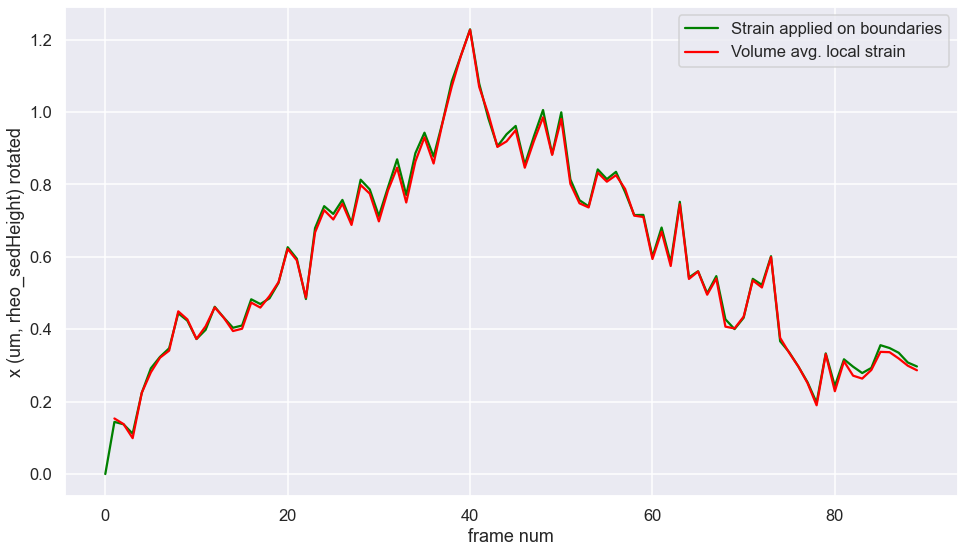

In [315]:
mag_gel = 1.0038
time_lag = [dt for x in range(0,41)] + [dt for x in range(41,90)]
sns.lineplot(x=range(90),y = 100*(sedTop_disp[_keys[0]]  - mag_gel*gelTop_disp[_keys[0]])/(h_mean), label='Strain applied on boundaries',color='green')
#sns.lineplot(x=range(90),y = 100*(sedTop_disp[_keys[0]]  - mag_gel*gelTop_disp[_keys[0]])/(h_mean), label='Strain applied on boundaries \n (SedTop(t) - gelTop(t+1))',color='blue')
sns.lineplot(data=tmp_rc_left, x=tmp_rc_left.index, y=tmp_rc_left['exz']*200, label='Volume avg. local strain',color='red')
#plt.savefig(figPath_frmt.format('BoundaryStrain.pdf'),dpi=300)

In [321]:
sedTop_disp[_keys[0]]
gelTop_disp[_keys[0]]
tmp_rc_left

,frame,exx,exy,exz,eyy,eyz,ezz,nnb count,D2_min
frame num,,,,,,,,,
1,"(0,1)",-0.000120,0.000001,0.000767,-0.000065,-0.000521,-0.001305,13.827784,0.187225
2,"(0,2)",-0.000116,0.000035,0.000690,-0.000157,-0.000404,-0.000422,13.807256,0.202566
3,"(0,3)",-0.000056,0.000051,0.000496,-0.000252,-0.000617,-0.000464,13.799770,0.209327
4,"(0,4)",-0.000139,0.000114,0.001123,-0.000301,-0.001276,-0.001106,13.794912,0.215111
5,"(0,5)",-0.000239,0.000129,0.001406,-0.000282,-0.001411,-0.000826,13.790355,0.222561
...,...,...,...,...,...,...,...,...,...
85,"(0,85)",-0.000699,0.000534,0.001687,-0.001459,-0.003249,-0.001645,13.596523,0.847530
86,"(0,86)",-0.000674,0.000535,0.001683,-0.001491,-0.003435,-0.001437,13.595265,0.856451
87,"(0,87)",-0.000661,0.000539,0.001596,-0.001514,-0.003207,-0.001751,13.594162,0.861372


In [322]:
6.25*1000*2*strain_para

array([ 0.        ,  9.59336208,  8.62785968,  6.19694841, 14.03868453,
       17.57326073, 20.08813321, 21.30296652, 28.08548591, 26.69514663,
       23.32872188, 25.5023574 , 28.76810678, 26.96930248, 24.68858123,
       25.08640063, 29.60105017, 28.73827666, 30.71681202, 33.14263222,
       38.85922266, 36.88520218, 30.46302758, 41.71219061, 45.55205418,
       43.94648714, 46.661108  , 43.00547748, 49.89965817, 48.40065738,
       43.61814577, 48.96703659, 52.88898994, 46.87696416, 53.94743934,
       58.11735006, 53.60455641, 60.77471536, 66.95558542, 72.23391002,
       76.67584438, 66.83673502, 62.13180902, 56.47562491, 57.4272645 ,
       59.35549835, 52.88338274, 57.48768709, 61.57972903, 55.09908076,
       61.30778371, 50.08125806, 46.73752622, 46.0221494 , 52.03364711,
       50.46837629, 51.58782304, 49.21139309, 44.60815828, 44.37161393,
       37.1199459 , 41.84311156, 35.92088517, 46.57581555, 33.6820299 ,
       34.96147   , 30.96049843, 33.74947305, 25.44328758, 25.14

<AxesSubplot:xlabel='frame num', ylabel='y (um, rheo_sedHeight) rotated'>

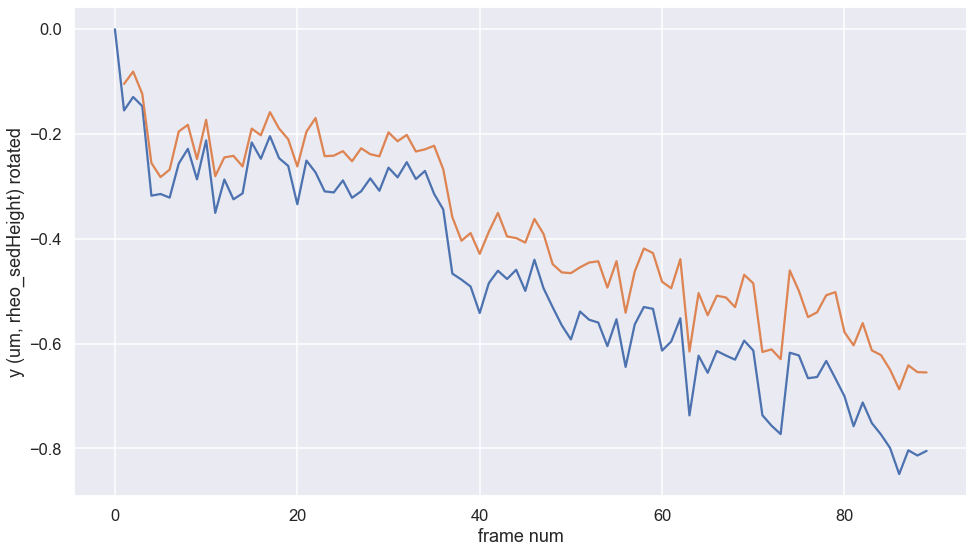

In [280]:
dt = 0.0
mag_gel = 1
time_lag = [dt for x in range(0,41)] + [dt for x in range(41,90)]
sns.lineplot(x=range(90),y = 100*(grid_disp_center[_keys[1]] -np.array(time_lag) - mag_gel*gelTop_disp[_keys[1]])/(h_mean))
sns.lineplot(data=tmp_r_leftT, x=tmp_rc_leftT.index, y=tmp_rc_leftT['eyz']*200)

<AxesSubplot:xlabel='frame num', ylabel='exz'>

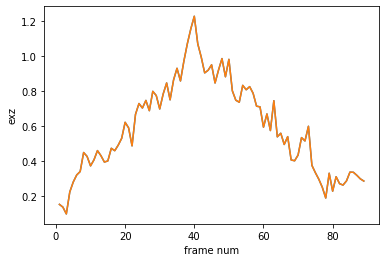

In [58]:
sns.lineplot(data=tmp_rc_leftT, x=tmp_rc_leftT.index, y=tmp_rc_leftT['exz']*200)
sns.lineplot(data=tmp_rc_left, x=tmp_rc_left.index, y=tmp_rc_left['exz']*200)

<AxesSubplot:ylabel='exz'>

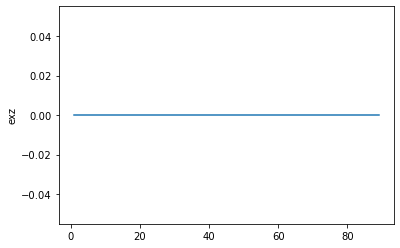

In [62]:
diff = tmp_rc_left['exz']*200 - tmp_rc_leftT['exz']*200
diff.shape
sns.lineplot(y=diff, x = range(1,90))

<AxesSubplot:>

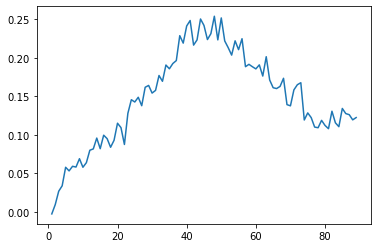

In [191]:
diff = 100*(grid_disp[_keys[0]] - gelTop_disp[_keys[0]])/(h_mean) - tmp['exz']*200
sns.lineplot(y=diff[1:], x = range(1,90))

NameError: name 'tmp_ct' is not defined

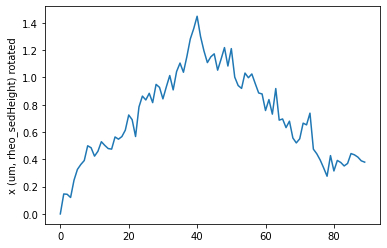

In [298]:
# parralle strain driection with coord transform on strain before rotation (I think )
sns.lineplot(x=range(90),y = 100*(grid_disp[_keys[0]] - gelTop_disp[_keys[0]])/(h_mean))
sns.lineplot(data=tmp_ct, x=tmp_ct.index, y=tmp_ct['exz']*200)

<AxesSubplot:xlabel='frame num', ylabel='exz'>

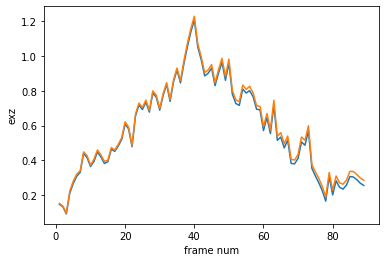

In [203]:
sns.lineplot( x=tmp.index, y=tmp['exz']*200)
sns.lineplot( x=tmp_ct.index, y=tmp_ct['exz']*200)

<AxesSubplot:xlabel='frame num', ylabel='exz'>

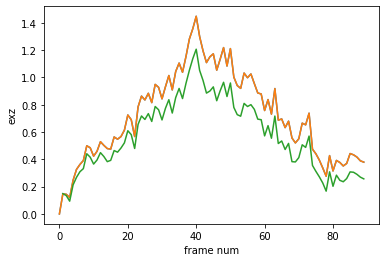

In [248]:
sns.lineplot(x=range(90),y = 100*(grid_disp[_keys[0]].to_numpy() - gelTop_disp[_keys[0]].to_numpy())/(h_mean))
sns.lineplot(x=range(90),y = 100*(grid_disp[_keys[0]].to_numpy() - gelTop_disp[_keys[0]].to_numpy())/(h_mean))
#sns.lineplot(x=range(90)[:-1],y = 100*(grid_disp[_keys[0]].to_numpy()[:-1] - gelTop_disp[_keys[0]].to_numpy()[1:])/(h_mean))
sns.lineplot(data=tmp, x=tmp.index, y=tmp['exz']*200)

# Comments on results
- Q: What doesnt "work"? 
- A: The vol averaged strain and boundary strains, after rotating the reference frame, no longer agree with each other. The boundary strain is always higher than the vol avg strain. 

## Hypotheses

- There is a bug in the code and somehow I am just not rotating correctly. Naively I would have thought that coordinate transformations should have **identical** effects on boundary strain and vol avg strain. If they agree in one coordinate system, rotating the coordinate should keep them in agreement even if the values change. This should be a property of thhe strain tensor and some boundary values of the integral. You shouldnt be able to rotate and bring them into agreement anymore than you can rotate and bring them out of agreement. The way to check this is to go back, rotate the coordinates and then recompute the strain in the rotated coordinates. This should give the same result as applying a rotation to the strain tensor (conjugation ie R @ epsilon @ R.T)
 >> Rotation matrix is transpose of coordinate transformation matrix? Hmmm... perhaps this is it. I just need to rotate displacements with r_left and conjugate with r_right? This sort of makes sense as we want to rotate the displacement of the grid into the image frame of refernce, which is the opposite rotation of rotating the coorinate system into the displacement of the grid. So which one am I doing? If I do a coordinate transformation on both displacement and strain, shouldn't I use the same transformation matrix? I think this was likely the mistake. 
 >> maybe the other problem is that I am wrapping the coordinate transform of (um, imageStack) -> (um, rheo_sedHeigt) into the transformation matrix. Why would I need to apply that tranformation on the conjugation? Not sure. 
- The boundary strain should be a bit higher becuase the grid is always head of the gel on loading (and some analogous process on unloading). Strain increase is always larger on loading and smaller on unloading due to non-zero time to scan from gel to grid
- The whole business of rotating the coordinate system is just garbage because of optical distotrtions ... possibly height dependent optical distortions. I should just scrap all of this and go back to image coordinates, which were basically correct. But still, why should a small rotation have such a large effect?  
- Using the displacements from the top surface of the gel is not the way to go because the gel is tilted. Using the displacement inferred from avg strain the gel is better measure of the strain applied across the boundary. 
 
Evidence
- We can assess lagging vs. leading grid displacmenets by pairing the gel disp at t with grid disp at (t-1) which should give a strain measure with the opposite error as if the sample was imaged from the grid to the gel. This produces a boundary strain that is lower than the vol avg strain suggesting that this does play a role. Its a little more complicated what to do with unloading. It does not however fix the problem
- From previous work (not in this notebook) if we infer the boundary displacements from avg gel strain, we can tune the thickness of the gel so that the boundary strain matches the volume avg strain. However, the gel thickness required are clearly not correct and differ from the best guess for gel thickness by several microns. 
- The hypothesis for height dependent optical distortions can be explicitly checked when I get back to lab. I jsut note that there is an adjustment collar on the objective and its possible that, for example, the gel was adjusted to have limited distortions while the sample accumulates some geometric distotions when you get to the top. The magnitude of the angle pincushion displacement field is larger at the top of the sample near the grid than the top of the gel. However, even that, the displacment are symmetric. 

In [281]:
# using r_left.T for coordinate transformation of strain, and r_left for rotating the displacement of the grid
# include coord transofrm on strain
r_left_rot2 = r_left.T@np.array(((1,0,0),(0,-1,0),(0,0,1)))
rot_np_coordTransform2 = rotation._rotate(sedStrain_frameParticle[['exx','exy','exz','eyy','eyz','ezz']].to_numpy(), _sig_np, r_left_rot )
rot_df_coordTransform2 = pd.DataFrame(data=rot_np_coordTransform2, index=sedStrain_frameParticle.index, columns= ['exx','exy','exz','eyy','eyz','ezz']).join(sedStrain_frameParticle[['nnb count','D2_min']])

In [ ]:
strain_mean_ct2 = rot_df_coordTransform2[rot_df_coordTransform2['nnb count'] > 5].groupby('frame').mean()
tmp_c2t = strain_mean_ct2.reset_index()
tmp_ct2['frame num'] = tmp_ct2['frame'].apply(lambda fstr: int(fstr.split(',')[-1][:-1]))
tmp_ct2 = tmp_ct2.set_index('frame num').sort_index()
tmp_ct2

In [ ]:
# parralle strain driection with coord transform on strain before rotation (I think )
sns.lineplot(x=range(90),y = 100*(grid_disp[_keys[0]] - gelTop_disp[_keys[0]])/(h_mean))
sns.lineplot(data=tmp_ct2, x=tmp_ct2.index, y=tmp_ct2['exz']*200)

<AxesSubplot:xlabel='frame num', ylabel='eyz'>

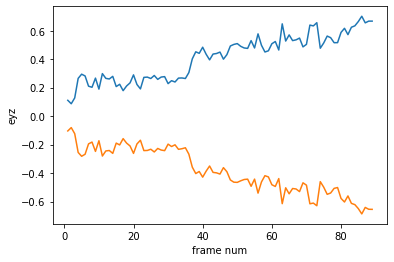

In [249]:
sns.lineplot( x=tmp.index, y=tmp['eyz']*200)
sns.lineplot( x=tmp_ct.index, y=tmp_ct['eyz']*200)

<AxesSubplot:xlabel='frame num', ylabel='y (um, rheo_sedHeight) rotated'>

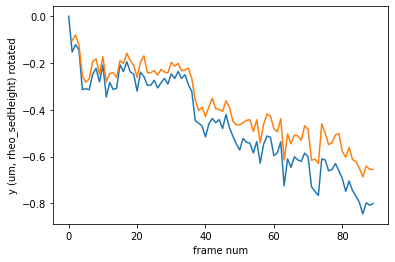

In [250]:
sns.lineplot(x=range(90),y = 100*(grid_disp[_keys[1]] - gelTop_disp[_keys[1]])/(h_mean))
sns.lineplot(data=tmp, x=tmp_ct.index, y=tmp_ct['eyz']*200)

<AxesSubplot:xlabel='frame num', ylabel='D2_min'>

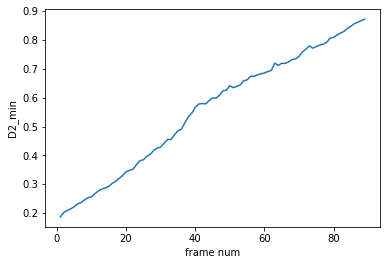

In [251]:
sns.lineplot(data=tmp, x=tmp.index, y='D2_min')

<AxesSubplot:xlabel='frame num', ylabel='exz'>

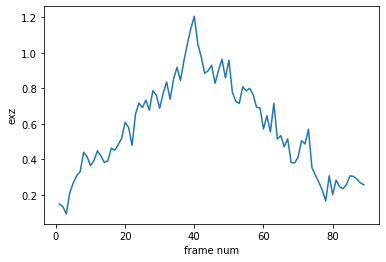

In [252]:
sns.lineplot(data=tmp, x=tmp.index, y=tmp['exz']*200)

In [412]:
#out = []
#for t in range(1,4):
#    print(t)
#    out.append(rotation.rotateStrain(sedStrain_traj,'(0,{})'.format(t),r_left))
reload(rotation)
out = rotation.rotateStrain(sedStrain_traj,list(sedStrain_traj.columns), r_left, returnIdx='timeParticle')

In [413]:
out['trace'] = out['exx'] + out['eyy'] + out['ezz']

out['vonMises'] = vonMises(out)

In [254]:
def vonMises(df):
    xx,yy,zz= df['exx'],df['eyy'],df['ezz']
    xy,yz,xz = df['exy'], df['eyz'],df['exz']
    return np.sqrt(1/2*((xx -yy)**2 + (yy-zz)**2 + (zz-xx)**2) +3*(xy**2 + yz**2 + xz**2))

In [271]:
tmp_ct['vonMises'] = vonMises(tmp_ct)
tmp_ct
vonMises_rot = pd.DataFrame(data = vonMises(rot_df_coordTransform).to_numpy(), index = rot_df_coordTransform.index, columns=['vonMises'])

In [273]:
vonMises_mean_ct = vonMises_rot[rot_df_coordTransform['nnb count'] > 5].groupby('frame').mean()
tmp_vm = vonMises_mean_ct.reset_index()
tmp_vm['frame num'] = tmp_vm['frame'].apply(lambda fstr: int(fstr.split(',')[-1][:-1]))
tmp_vm = tmp_vm.set_index('frame num').sort_index()
tmp_vm


,frame,vonMises
frame num,,
1,"(0,1)",0.022553
2,"(0,2)",0.023499
3,"(0,3)",0.023881
4,"(0,4)",0.024392
5,"(0,5)",0.024978
...,...,...
85,"(0,85)",0.049889
86,"(0,86)",0.050238
87,"(0,87)",0.050327


<AxesSubplot:xlabel='D2_min', ylabel='vonMises'>

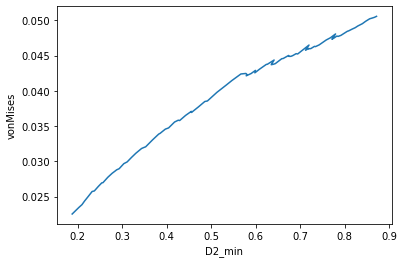

In [280]:
sns.lineplot(x=tmp_ct['D2_min'], y=tmp_vm['vonMises'],sort=False)
#sns.lineplot(data=tmp, x=tmp.index, y='D2_min')
#sns.lineplot(x=range(89), y=tmp_ct['exz']*100*np.sqrt(3))

In [259]:
nnbIdx = sedStrain_traj.unstack().stack(0).swaplevel(i=0,j=1,axis='index')['nnb count']

KeyboardInterrupt: 

       particle
(0,1)  1           6.0
(0,2)  1           6.0
(0,3)  1           6.0
(0,4)  1           5.0
(0,5)  1           5.0
                  ... 
       966620      9.0
(0,6)  966620      9.0
(0,7)  966620      8.0
(0,8)  966620      7.0
(0,9)  966620      7.0
Name: nnb count, Length: 82166583, dtype: float64

In [480]:
(sedStrain_traj.loc[(slice(None),'nnb count'),:]>5).unstack().unstack().index.droplevel(1)

MultiIndex([( '(0,1)',      1),
            ( '(0,1)',      4),
            ( '(0,1)',      7),
            ( '(0,1)',      8),
            ( '(0,1)',     12),
            ( '(0,1)',     14),
            ( '(0,1)',     16),
            ( '(0,1)',     20),
            ( '(0,1)',     22),
            ( '(0,1)',     23),
            ...
            ('(0,89)', 966608),
            ('(0,89)', 966609),
            ('(0,89)', 966611),
            ('(0,89)', 966612),
            ('(0,89)', 966614),
            ('(0,89)', 966615),
            ('(0,89)', 966616),
            ('(0,89)', 966617),
            ('(0,89)', 966619),
            ('(0,89)', 966620)],
           names=[None, 'particle'], length=85407515)

In [488]:
out_nnb5 = out.loc[(sedStrain_traj.loc[(slice(None),'nnb count'),:]>5).unstack().unstack().values]

/Users/zsolt/.conda/envs/tractionRheoscopy/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='exz', ylabel='Density'>

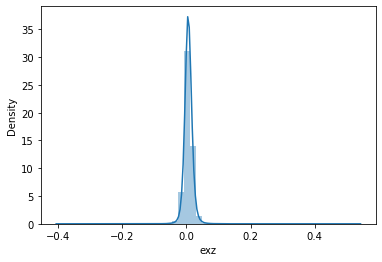

In [492]:
tmp = out_nnb5.loc[('(0,40)',slice(None)),'exz']
sns.distplot(tmp)

In [228]:
(83.954-28.348),h_mean,h_mean*0.97

(55.605999999999995, 57.46979601899298, 55.74570213842319)

In [495]:
# another option would be convert sedStrain_traj into (time, particle) indexing
# and rewrite the rotation wrapper (which to be fair should be simple as values are already in the numpy input style. )

In [495]:
# I am convinced that the correct format for strain traj moving forward is (time, particle) multindex with columns for each of the values (strain, nnb etc)
# The previous format is (particle, value) with columns for time. This is less good as basic operations like compute trace or plot nnb distributions involve
# selecting a portion of the index. 
# what operation would be hard with (time, particle) indexing? 
# >> Plot all trajectories of particles with max(von Mises) > threshold? 
# slect for vonMises above threshold, get unique particle id's, select those particle id's by slicing irrespective of time or other coordinates. 

## von Mises

In [4]:
# compute vonMises in rotated strain 
reload(da)
reload(rotation)

<module 'data_analysis.rotation' from '/Users/zsolt/Colloid_git/TractionRheoscopy/data_analysis/rotation.py'>

In [5]:
sedStrain_fp = da.traj2frameParticle(sedStrain_traj)

In [6]:
# load data analysis metaData
meta_path = '/Users/zsolt/Colloid_git/TractionRheoscopy/metaDataYAML/tfrGel10212018A_shearRun10292018f_metaData.yaml'
meta = grid_track.loadMetaData(meta_path,'data_analysis')
meta.keys()

rotDict = rotation.parseRotYaml(meta['rotation']['rotationMatrix'])
r_left = rotDict['prod_zyx (left)']

# rc_left applies a transformation to (rheo, sedHeight) coordinate from (um, imageStack), apart form translation of center which doesnt show up anyway. 
rc_left = r_left @ np.array(((1,0,0),(0,-1,0),(0,0,1)))

In [7]:
#rc_left
meta['rotation']

{'description': 'This is rotation matrix to rotate image coordinates in rheo_sedHeight coordinate system to coordinates in which the shear direction is along the x direction The coordinate system it assumes is listed under the key coordStr If it is rheo_sedHeight, this coordinate system is just a reflection of the y-axis from the image coordinate system so that it is right handed (ie right handed with z point up into the sample and x to the right, where as the image coordinate system is the array indexing with x being the fasted index, y pointing down, and z going up into the sample.)\n',
 'tracer': {'description': 'This is the manual tracking of a particle clearly on the TEM grid over a few time points\n',
  'coordStr': '(um, imageCoord)',
  'position': [[], []],
  'time_list': [[0, 10, 30, 40, 50, 60, 70]]},
 'rotationMatrix': {'coordStr': '(um, rheo_sedHeight)',
  'handed': 'right',
  'positiveSignature': 'clockwise',
  'units': 'degrees',
  'theta_x': 0,
  'theta_y': 0,
  'theta_z'

In [8]:
sedStrain_fp

values             D2_min       exx       exy       exz       eyy       eyz  \
frame  particle                                                               
(0,1)  1         0.091007  0.011591 -0.010121 -0.007984  0.008537  0.004810   
       4         0.072556  0.004609  0.000526 -0.010615 -0.007425 -0.015354   
       7         0.068485 -0.002058 -0.000601 -0.003270 -0.004937 -0.020609   
       8         0.123259 -0.003628 -0.002255  0.003940 -0.009127 -0.000940   
       12        0.263317 -0.008424 -0.002495  0.003048  0.009275 -0.013323   
...                   ...       ...       ...       ...       ...       ...   
(0,89) 966608    0.599882  0.028857  0.010630 -0.058179  0.022753  0.013150   
       966609    2.120843 -0.014212  0.049120  0.031294  0.021256  0.073846   
       966611    0.386537 -0.000219 -0.003213  0.022503 -0.006216  0.003287   
       966612    0.359476  0.003795 -0.016597 -0.000576  0.012263  0.015917   
       966614    0.625155 -0.011404  0.000857 -0.001301  0.008125  0.021885   

values                ezz  nnb count       rxy       rxz       ryz  
frame  particle                                                     
(0,1)  1         0.044463        6.0 -0.002290  0.004448  0.000674  
       4        -0.031272        6.0  0.002729 -0.003001  0.014332  
       7        -0.001219        9.0 -0.005521  0.004756 -0.010854  
       8         0.029012       11.0 -0.013784  0.002774 -0.000732  
       12       -0.084368        8.0  0.002554 -0.013346  0.023345  
...                   ...        ...       ...       ...       ...  
(0,89) 966608    0.051486        7.0  0.017736 -0.035023 -0.021668  
       966609    0.038145        8.0  0.077705  0.027482 -0.021541  
       966611   -0.005890       15.0  0.000467  0.004727  0.003028  
       966612    0.025330       15.0 -0.000943 -0.008652  0.005424  
       966614    0.002325       15.0  0.020613  0.015556  0.030392  

[82166583 rows x 11 columns]

In [9]:
sedStrain_fp_rot = rotation.rotateStrain(sedStrain_fp, rc_left)

In [10]:
# this isnt worth is unless you are going to cross correlate on a different dataset.
# for multiple conditions on single df, just apply multiple logical indices:
# (sedStrain_fp_rot['nnb count'] > 9)  & (sedStrain_fp_rot['D2_min'] > 0.2)
nnb9_idx = sedStrain_fp_rot[sedStrain_fp_rot['nnb count'] > 9].index

In [366]:
sedStrain_fp_rot.loc[nnb9_idx]

exx       exy       exz       eyy       eyz       ezz  \
frame  particle                                                               
(0,1)  8        -0.003733  0.002377  0.003917 -0.009022  0.001029  0.029012   
       20        0.005970 -0.001232 -0.000267 -0.006076 -0.003213  0.031180   
       22       -0.012889 -0.001603  0.019870  0.000243 -0.004927  0.072863   
       33       -0.012440  0.004182  0.002874 -0.006693 -0.002775 -0.007667   
       45        0.002040  0.000841  0.022251 -0.005515 -0.014770  0.058659   
...                   ...       ...       ...       ...       ...       ...   
(0,89) 966591   -0.012746 -0.007805 -0.007119 -0.000748 -0.014808 -0.020531   
       966606   -0.000853  0.020944 -0.065801 -0.003805 -0.004175  0.070973   
       966611   -0.000368  0.003346  0.022572 -0.006068 -0.002775 -0.005890   
       966612    0.003046  0.016388 -0.000215  0.013012 -0.015926  0.025330   
       966614   -0.011355 -0.001299 -0.000804  0.008076 -0.021909  0.002325   

                 nnb count    D2_min  
frame  particle                       
(0,1)  8              11.0  0.123259  
       20             11.0  0.123335  
       22             10.0  0.198674  
       33             10.0  0.134573  
       45             10.0  0.198003  
...                    ...       ...  
(0,89) 966591         11.0  0.491134  
       966606         10.0  1.106818  
       966611         15.0  0.386537  
       966612         15.0  0.359476  
       966614         15.0  0.625155  

[79760678 rows x 8 columns]

In [370]:
# now create matrix of eigenvectors and eigenvalues
reload(da)

<module 'data_analysis.static' from '/Users/zsolt/Colloid_git/TractionRheoscopy/data_analysis/static.py'>

In [11]:
eigendf = da.strainDiag(sedStrain_fp_rot[sedStrain_fp_rot['nnb count'] > 9 ])

In [13]:
# save eigen df and sedStrain_fp_rot
#path = '/Users/zsolt/Colloid/DATA/tfrGel10212018x/tfrGel10212018A_shearRun10292018f/locations_stitch/'
#fName_frmt = 'tfrGel10212018A_shearRun10292018f_{}.h5'
#eigendf.to_hdf(path+fName_frmt.format('eigenStrain_decomposition'),'eigen')
#sedStrain_fp_rot.to_hdf(path+fName_frmt.format('sedStrain_paraX_perpY'),'sedStrain')

In [11]:
_strainKeys = ['exx','exy','exz','eyy','eyz','ezz']

In [378]:
sedStrain_fp_rot.head(25)[_strainKeys].to_numpy()
sedStrain_fp_rot.head(25)

exx       exy       exz       eyy       eyz       ezz  \
frame particle                                                               
(0,1) 1         0.011130  0.010180 -0.007873  0.008997 -0.004990  0.044463   
      4         0.004627 -0.000252 -0.010961 -0.007443  0.015109 -0.031272   
      7        -0.002087  0.000666 -0.003737 -0.004908  0.020530 -0.001219   
      8        -0.003733  0.002377  0.003917 -0.009022  0.001029  0.029012   
      12       -0.008529  0.002091  0.002745  0.009379  0.013389 -0.084368   
      14       -0.007410 -0.009246  0.012761  0.004379 -0.004215 -0.077223   
      16       -0.010600 -0.007272  0.001664  0.000143 -0.000244 -0.009386   
      20        0.005970 -0.001232 -0.000267 -0.006076 -0.003213  0.031180   
      22       -0.012889 -0.001603  0.019870  0.000243 -0.004927  0.072863   
      23       -0.000363 -0.000191  0.013690 -0.004883  0.010233  0.003167   
      24        0.007185 -0.000428 -0.013798  0.007761 -0.000268 -0.058620   
      28        0.000113 -0.007361  0.014719  0.004895 -0.013646  0.011600   
      32        0.005469 -0.000879  0.004642  0.001195 -0.029955 -0.012370   
      33       -0.012440  0.004182  0.002874 -0.006693 -0.002775 -0.007667   
      34        0.013278 -0.004483 -0.009617  0.005186  0.002205  0.013400   
      35       -0.000056  0.001318  0.014955  0.000149 -0.002796  0.002287   
      36       -0.004486  0.001526  0.002577  0.000694 -0.010575  0.027488   
      37       -0.007080 -0.005212  0.007063  0.006327  0.000576 -0.065986   
      39        0.003830 -0.003005  0.027200 -0.011040  0.004675  0.077818   
      40       -0.004094  0.002784  0.022254  0.005931 -0.002436 -0.027263   
      42        0.019047  0.008132 -0.003597 -0.002930 -0.001811 -0.013002   
      43       -0.003309  0.004156 -0.010345 -0.011091  0.002695 -0.027972   
      45        0.002040  0.000841  0.022251 -0.005515 -0.014770  0.058659   
      46       -0.002598  0.005329  0.013804 -0.007360 -0.009205 -0.037449   
      48       -0.000861  0.001891  0.001887  0.002092 -0.004681  0.005397   

                nnb count    D2_min  
frame particle                       
(0,1) 1               6.0  0.091007  
      4               6.0  0.072556  
      7               9.0  0.068485  
      8              11.0  0.123259  
      12              8.0  0.263317  
      14              9.0  0.303355  
      16              8.0  0.107501  
      20             11.0  0.123335  
      22             10.0  0.198674  
      23              9.0  0.050813  
      24              9.0  0.181631  
      28              9.0  0.092281  
      32              9.0  0.129939  
      33             10.0  0.134573  
      34              9.0  0.078707  
      35              9.0  0.080915  
      36              7.0  0.135786  
      37              9.0  0.207470  
      39              8.0  0.178301  
      40              9.0  0.132260  
      42              9.0  0.201041  
      43              9.0  0.055523  
      45             10.0  0.198003  
      46              9.0  0.115937  
      48              9.0  0.051006

In [18]:
def _strainDiag(strain_1d):
    exx,exy,exz,eyy,eyz,ezz = strain_1d
    e = np.array([[exx, exy, exz],
                  [exy, eyy, eyz],
                  [exz, eyz, ezz]])
    eigen_val, eigen_vec = np.linalg.eig(e)
    # now sort by eigen value
    idx = eigen_val.argsort()[::-1]
    # return sorted val and vec
    tmp = eigen_val[idx],eigen_vec[:,idx]
    return np.array([np.concatenate((tmp[0][n],tmp[1][n]),axis=None) for n in range(3)]).flatten()

In [19]:
eigen = [_strainDiag(elt) for elt in sedStrain_fp_rot[sedStrain_fp_rot['nnb count'] > 9][_strainKeys].to_numpy() ]

In [14]:
m_idx = sedStrain_fp_rot[sedStrain_fp_rot['nnb count'] > 9].index

In [23]:
#m_idx = pd.MultiIndex.from_product([sedStrain_fp_rot[sedStrain_fp_rot['nnb count'] > 9].index, ['u', 'v', 'w']], names=['particle', 'eigen vector'])

In [31]:
eigen_df = pd.DataFrame(np.array(eigen), index=m_idx, columns=['u','ux','uy','uz','v','vx','vy','vz','w','wx','wy','wz'])

In [15]:
eigendf

u        ux        uy        uz         v        vx  \
frame  particle                                                               
(0,1)  8         0.029518 -0.119321 -0.923598  0.364321 -0.003323 -0.033847   
       20        0.031456 -0.006340  0.994975 -0.099920  0.006095 -0.085079   
       22        0.077587  0.215152 -0.014301 -0.976476 -0.000086 -0.066522   
       33       -0.003957 -0.279299 -0.546555  0.789474 -0.006489 -0.860041   
       45        0.068888 -0.308491 -0.775435  0.550939 -0.001196  0.181858   
...                   ...       ...       ...       ...       ...       ...   
(0,89) 966591    0.007864  0.193273 -0.876760 -0.440383 -0.008553 -0.888989   
       966606    0.111812 -0.517542  0.250336 -0.818219  0.000564 -0.124325   
       966611    0.019628 -0.750192 -0.115099 -0.651125 -0.005193 -0.026334   
       966612    0.039103 -0.288020 -0.640523  0.711881  0.014046 -0.624195   
       966614    0.027303  0.011546  0.970597 -0.240435 -0.010998 -0.751909   

                       vy        vz         w        wx        wy        wz  
frame  particle                                                              
(0,1)  8        -0.362945 -0.931196 -0.009939 -0.992279  0.123442 -0.012046  
       20       -0.100096 -0.991334 -0.006477  0.996354 -0.002216 -0.085286  
       22        0.997356 -0.029264 -0.017284  0.974312  0.071254  0.213632  
       33       -0.223225 -0.458804 -0.016355  0.426992 -0.807123 -0.407713  
       45       -0.616583 -0.765998 -0.012507 -0.933681  0.136111 -0.331230  
...                   ...       ...       ...       ...       ...       ...  
(0,89) 966591    0.033429 -0.456707 -0.033337  0.415144  0.479765 -0.772969  
       966606    0.924098  0.361368 -0.046062  0.846578  0.288748 -0.447136  
       966611   -0.978751  0.203355 -0.026761 -0.660695  0.169702  0.731220  
       966612   -0.438193 -0.646813 -0.011761  0.726240 -0.630648 -0.273603  
       966614   -0.150081 -0.641957 -0.017258  0.659166 -0.188197 -0.728067  

[79760678 rows x 12 columns]

# Great, so what do I need to do now? 

- compute von Mises strain as an additional column
- compute the direction of maximally resolved shear stress
    - the maximally resolved shear stress idrection is 45 deg rotation of u toward w
      which is around v as the eigenvectors are orthogonal system, although the roation angle may be -45..not sure)
      --> u x w = v
    - the component in the shear direction is the x component of that 
    - carrying out this rotation requires Rodrigues formula. 
- also, keeping track of all the coordination transformations so far: 
    - px, imageStack -> um, imageStack -> um, rheoSedHeight -> um, rheoSedHeight rotated
    

In [36]:
u,v,w = eigen_df.loc[('(0,1)',8),['ux','uy','uz']].to_numpy(), eigen_df.loc[('(0,1)',8),['vx','vy','vz']].to_numpy(), eigen_df.loc[('(0,1)',8),['wx','wy','wz']].to_numpy()


In [52]:
def rodrigues(u,k,theta):
    """
    rotate u in the plane defined by normal k about angle theta using rodrigues formula
    """
    K = np.array(((0,-k[2],k[1]),(k[2],0,-k[0]),(-k[1],k[0],0)))
    R = np.eye(3) + np.sin(theta)*K + (1 - np.cos(theta))*K@K
    return R@u


In [53]:
x = rodrigues(np.array((1,0,0)),np.array((0,0,1)),45*np.pi/180)
x, np.dot(x,x)

(array([0.70710678, 0.70710678, 0.        ]), 1.0)

In [55]:
eigen_micro = eigen_df.head(10)

In [57]:
eigen_micro

u        ux        uy        uz         v        vx  \
frame particle                                                               
(0,1) 8         0.029518 -0.119321 -0.923598  0.364321 -0.003323 -0.033847   
      20        0.031456 -0.006340  0.994975 -0.099920  0.006095 -0.085079   
      22        0.077587  0.215152 -0.014301 -0.976476 -0.000086 -0.066522   
      33       -0.003957 -0.279299 -0.546555  0.789474 -0.006489 -0.860041   
      45        0.068888 -0.308491 -0.775435  0.550939 -0.001196  0.181858   
      50        0.037318  0.485171  0.873491  0.040294 -0.001135  0.359649   
      51        0.001556  0.778123  0.600313  0.184793  0.000299 -0.604406   
      52        0.030681  0.526032 -0.301586 -0.795196 -0.002628 -0.299639   
      55        0.008777  0.763179 -0.375748  0.525711 -0.000827 -0.531337   
      56        0.000155  0.796208  0.567638  0.209380 -0.002084  0.532005   

                      vy        vz         w        wx        wy        wz  
frame particle                                                              
(0,1) 8        -0.362945 -0.931196 -0.009939 -0.992279  0.123442 -0.012046  
      20       -0.100096 -0.991334 -0.006477  0.996354 -0.002216 -0.085286  
      22        0.997356 -0.029264 -0.017284  0.974312  0.071254  0.213632  
      33       -0.223225 -0.458804 -0.016355  0.426992 -0.807123 -0.407713  
      45       -0.616583 -0.765998 -0.012507 -0.933681  0.136111 -0.331230  
      50       -0.157336 -0.919727 -0.010142  0.797034 -0.460716  0.390485  
      51        0.795681 -0.039803 -0.025443  0.170930  0.080719 -0.981971  
      52        0.809337 -0.505164 -0.005332  0.795932  0.504004  0.335370  
      55       -0.827902  0.179610 -0.025452 -0.367749  0.416404  0.831486  
      56       -0.821669  0.204527 -0.025873 -0.288139  0.051455  0.956205

In [83]:
U = eigen_micro[u_keys].to_numpy()
V = eigen_micro[v_keys].to_numpy()
theta = np.full(U.shape[0], 45*np.pi/180)

from numba import jit
@jit
def rodrigues_jit(U,V,theta):
    out = np.zeros(U.shape)
    for n in range(U.shape[0]):
        k = V[n]
        u = U[n]
        K = np.array(((0,-k[2],k[1]),(k[2],0,-k[0]),(-k[1],k[0],0)))
        R = np.eye(3) + np.sin(theta)*K + (1 - np.cos(theta))*K@K
        out[n,:] = R@u
    return out

In [85]:
pd.DataFrame(data= rodrigues_jit(U,V,45*np.pi/180), index= eigen_micro.index, columns=['x','y','z'])

x         y         z
frame particle                              
(0,1) 8        -0.786019 -0.565796  0.249096
      20        0.700046  0.701987 -0.130960
      22       -0.536807 -0.060496 -0.841533
      33       -0.499423  0.184250  0.846539
      45       -0.878349 -0.452071  0.155358
      50        0.906655  0.291876  0.304606
      51        0.671082  0.481562 -0.563690
      52       -0.190848 -0.569638 -0.799431
      55        0.279612  0.028749  0.959683
      56        0.359259  0.437765  0.824194

In [110]:
reload(rotation)
eigen_df = eigen_df.join(rotation.maxShearStrain(eigen_df))

In [111]:
eigen_df

u        ux        uy        uz         v        vx  \
frame  particle                                                               
(0,1)  8         0.029518 -0.119321 -0.923598  0.364321 -0.003323 -0.033847   
       20        0.031456 -0.006340  0.994975 -0.099920  0.006095 -0.085079   
       22        0.077587  0.215152 -0.014301 -0.976476 -0.000086 -0.066522   
       33       -0.003957 -0.279299 -0.546555  0.789474 -0.006489 -0.860041   
       45        0.068888 -0.308491 -0.775435  0.550939 -0.001196  0.181858   
...                   ...       ...       ...       ...       ...       ...   
(0,89) 966591    0.007864  0.193273 -0.876760 -0.440383 -0.008553 -0.888989   
       966606    0.111812 -0.517542  0.250336 -0.818219  0.000564 -0.124325   
       966611    0.019628 -0.750192 -0.115099 -0.651125 -0.005193 -0.026334   
       966612    0.039103 -0.288020 -0.640523  0.711881  0.014046 -0.624195   
       966614    0.027303  0.011546  0.970597 -0.240435 -0.010998 -0.751909   

                       vy        vz         w        wx        wy        wz  \
frame  particle                                                               
(0,1)  8        -0.362945 -0.931196 -0.009939 -0.992279  0.123442 -0.012046   
       20       -0.100096 -0.991334 -0.006477  0.996354 -0.002216 -0.085286   
       22        0.997356 -0.029264 -0.017284  0.974312  0.071254  0.213632   
       33       -0.223225 -0.458804 -0.016355  0.426992 -0.807123 -0.407713   
       45       -0.616583 -0.765998 -0.012507 -0.933681  0.136111 -0.331230   
...                   ...       ...       ...       ...       ...       ...   
(0,89) 966591    0.033429 -0.456707 -0.033337  0.415144  0.479765 -0.772969   
       966606    0.924098  0.361368 -0.046062  0.846578  0.288748 -0.447136   
       966611   -0.978751  0.203355 -0.026761 -0.660695  0.169702  0.731220   
       966612   -0.438193 -0.646813 -0.011761  0.726240 -0.630648 -0.273603   
       966614   -0.150081 -0.641957 -0.017258  0.659166 -0.188197 -0.728067   

                       tx        ty        tz  
frame  particle                                
(0,1)  8        -0.031014 -0.022325  0.009829  
       20        0.026555  0.026629 -0.004968  
       22       -0.050927 -0.005739 -0.079837  
       33       -0.006192  0.002284  0.010495  
       45       -0.071493 -0.036796  0.012645  
...                   ...       ...       ...  
(0,89) 966591   -0.006464 -0.039520  0.009689  
       966606   -0.152282 -0.004288 -0.041425  
       966611   -0.002936 -0.009342 -0.045344  
       966612   -0.036480 -0.000355  0.035445  
       966614    0.021134  0.024653 -0.030517  

[79760678 rows x 15 columns]

In [77]:
u_keys = ['u{}'.format(x) for x in ['x','y','z']]
v_keys = ['v{}'.format(x) for x in ['x','y','z']]
w_keys = ['w{}'.format(x) for x in ['x','y','z']]
theta = 45*np.pi/180
eigen_micro.apply(lambda x: rodrigues(np.array(x[u_keys]), np.array(x[v_keys]),theta) ,axis=1)
#pd.DataFrame(eigen_micro.apply(lambda x: rodrigues(np.array(x[u_keys]), np.array(x[v_keys]),theta) ,axis=1).to_numpy(),columns=['x','y','z'])

frame  particle
(0,1)  8           [-0.7860193500662991, -0.5657955718327357, 0.2...
       20          [0.700045561002625, 0.7019869216251734, -0.130...
       22          [-0.5368070196732398, -0.06049618634131321, -0...
       33          [-0.49942327055988894, 0.1842495702044074, 0.8...
       45          [-0.8783485335049248, -0.4520705304128637, 0.1...
       50          [0.9066552430561002, 0.2918755865392461, 0.304...
       51          [0.6710822980967457, 0.48156224336961756, -0.5...
       52          [-0.19084786105640467, -0.5696376291061958, -0...
       55          [0.27961150363251286, 0.02874850049991881, 0.9...
       56          [0.3592591129896527, 0.4377645845705534, 0.824...
dtype: object

In [140]:
_tmp = eigen_df.xs('(0,80)',level='frame')

/Users/zsolt/.conda/envs/tractionRheoscopy/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ty', ylabel='Density'>

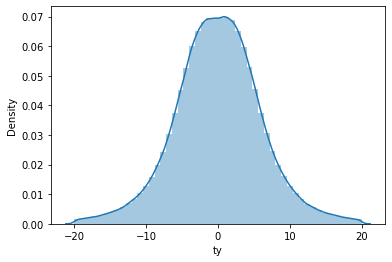

In [141]:
#sns.jointplot(x=_tmp['tx'],y=_tmp['ty'],kind='hex')
_key = 'ty'
C = 0.1
sns.distplot(200*_tmp[(_tmp[_key] < C) & (_tmp[_key] > -1*C)][_key])

In [160]:
t=40
C = 0.075
_tmp = eigen_df.xs('(0,{})'.format(t),level='frame')

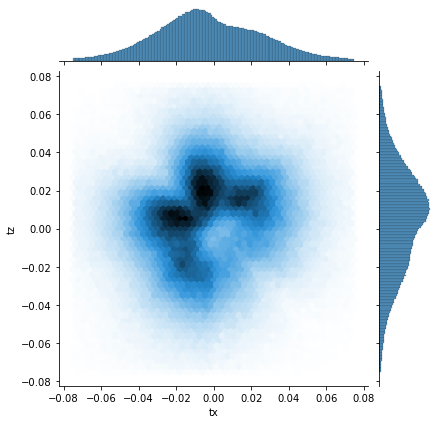

In [161]:
_idx = _tmp[(_tmp['tx'] < C) & (_tmp['tx'] > -1*C) & (_tmp['tz'] < C) & (_tmp['tz'] > -1*C)].index
sns.jointplot(data=_tmp.loc[_idx], x='tx', y='tz',kind='hex')

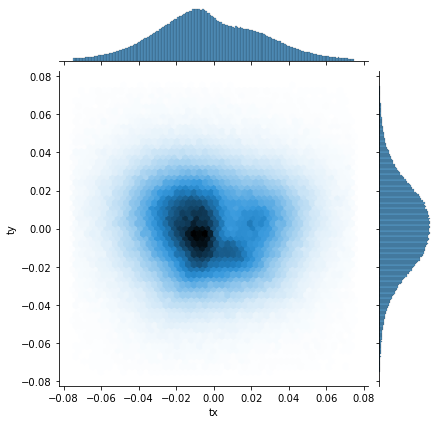

In [162]:
_idx = _tmp[(_tmp['tx'] < C) & (_tmp['tx'] > -1*C) & (_tmp['ty'] < C) & (_tmp['ty'] > -1*C)].index
sns.jointplot(data=_tmp.loc[_idx], x='tx', y='ty',kind='hex')

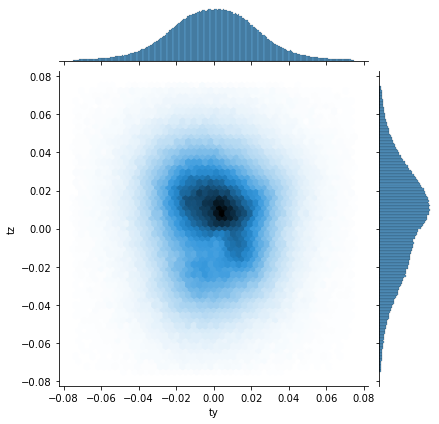

In [164]:
_idx = _tmp[(_tmp['tz'] < C) & (_tmp['tz'] > -1*C) & (_tmp['ty'] < C) & (_tmp['ty'] > -1*C)].index
sns.jointplot(data=_tmp.loc[_idx], x='ty', y='tz',kind='hex')

/Users/zsolt/.conda/envs/tractionRheoscopy/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/zsolt/.conda/envs/tractionRheoscopy/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/zsolt/.conda/envs/tractionRheoscopy/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `di

<AxesSubplot:xlabel='w', ylabel='Density'>

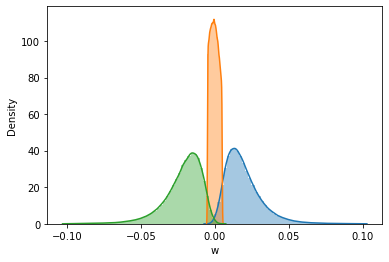

In [189]:
# Plot the eigen values (u,v,w)
_idx = _tmp[(_tmp['u'] < 0.1) & (_tmp['w']>-0.1)].index
_idx = _tmp[(_tmp['v'] < 0.005) & (_tmp['v']>-0.005)& (_tmp['u'] < 0.1) & (_tmp['w']>-0.1)].index
sns.distplot(_tmp.loc[_idx]['u'])
sns.distplot(_tmp.loc[_idx]['v'])
sns.distplot(_tmp.loc[_idx]['w'])

/Users/zsolt/.conda/envs/tractionRheoscopy/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/zsolt/.conda/envs/tractionRheoscopy/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/zsolt/.conda/envs/tractionRheoscopy/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `di

AttributeError: module 'matplotlib.pyplot' has no attribute 'legends'

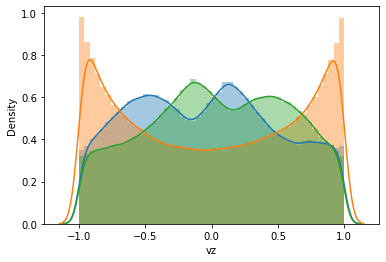

In [194]:
from matplotlib import pyplot as plt
sns.distplot(_tmp.loc[_idx]['vx'],label='vx')
sns.distplot(_tmp.loc[_idx]['vy'],label='vy')
sns.distplot(_tmp.loc[_idx]['vz'], label='vz')
plt.legends()

# SCRATCH 

In [178]:
e_shearXZ = np.array(((0,0,0.1),(0,0,0),(0.1,0,0)))
e_shearPlaneStress = np.array(((0,0,0.1),(0,0,0.05),(0.1,0.05,0)))
e_XXYY = np.array(((0.5,0,0),(0,0.1,0.0),(0.0,0.0,0)))
e_pressure = np.array(((0.1,0,0),(0,0.1,0.0),(0.0,0.0,0.1)))
def eigen_tmp(e):
    eigen_val, eigen_vec = np.linalg.eig(e)
    idx = idx = eigen_val.argsort()[::-1]
    tmp = eigen_val[idx],eigen_vec[:,idx]
    return eigen_val, eigen_vec
eigen_tmp(e_shearXZ), eigen_tmp(e_shearPlaneStrain), eigen_tmp(e_XXYY), eigen_tmp(e_pressure)
#pd.DataFrame(np.array([np.concatenate((tmp[0][n],tmp[1][n]),axis=None) for n in range(3)]).flatten(),columns=['u','ux','uy','uz','v','vx','vy','vz','w','wx','wy','wz'])

((array([ 0.1, -0.1,  0. ]),
  array([[ 0.70710678, -0.70710678,  0.        ],
         [ 0.        ,  0.        ,  1.        ],
         [ 0.70710678,  0.70710678,  0.        ]])),
 (array([-1.11803399e-01,  1.11803399e-01, -1.56537819e-18]),
  array([[ 6.32455532e-01, -6.32455532e-01,  4.47213595e-01],
         [ 3.16227766e-01, -3.16227766e-01, -8.94427191e-01],
         [-7.07106781e-01, -7.07106781e-01,  1.41909336e-16]])),
 (array([0.5, 0.1, 0. ]),
  array([[1., 0., 0.],
         [0., 1., 0.],
         [0., 0., 1.]])),
 (array([0.1, 0.1, 0.1]),
  array([[1., 0., 0.],
         [0., 1., 0.],
         [0., 0., 1.]])))

In [ ]:
# compute strain in the gel (easy to do directly in rheo_sedHeight coordinates)

In [ ]:
# rotate and transform strain into rheo_sedHeight

In [ ]:
# compare boundary and vol. avg strains in para and perp. 

In [ ]:
# vary the parameters. 